<a href="https://colab.research.google.com/github/Kozhedu/Credit-Default/blob/main/%D0%98%D0%9F_%D0%9A%D0%BE%D0%B6%D0%B5%D0%B4%D1%83%D0%B1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импорт всех необходимых библиотек**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

<b><p>data.csv</p></b>
<ul>
<li>id: id транзакции </li>
<li>timestamp: дата продажи (транзакции) </li>
<li>full_sq: общая площадь  </li>
<li>life_sq: жилая площадь  </li>
<li>floor: этаж  </li>
<li>max_floor: количество этажей в здании </li>
<li>material: материал, из которого изговолены стены  </li>
<li>build_year: год строительства </li>
<li>num_room: количество жилых комнат </li>
<li>kitch_sq: площадь кухни </li>
<li>full_all: количество населения в регионе </li>
<li> state: жилищные условия </li>
<li>sub_area: название территории </li>
<li>price_doc: цена квартиры (целевая переменная) </li>
</ul>

<b><p>macro.csv</p></b>
<ul>
<li>timestamp : дата, на которую актуальны макроэкономические показатели </li>
<li>salary : средняя зарплата в регионе </li>
<li>fixed_basket: стоимость потребительской корзины </li>
<li>rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса </li>
<li>rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса </li>
<li>rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса </li>
<li>average_life_exp: средняя продолжительность жизни в регионе </li>
</ul>

## 1.2 Загрузка данных общее описание набора данных

In [ ]:
PATH_base = "https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data.csv"
PATH_add = "https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data_macro.csv"
df = pd.read_csv(PATH_base)
macro =  pd.read_csv(PATH_add)

### 1.2.1 Базовый датасет

Вывести пример данных (первые строки и случайные строки)

In [ ]:
df.head(2)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,9000000


In [ ]:
df.sample()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
7404,18638,2014-05-20,38,18.0,3.0,3.0,17.0,1.0,2003.0,1.0,7.0,139322,Severnoe Izmajlovo,7150000


Размер набора данных

In [ ]:
df.shape

(18866, 14)

Описание типов данных по признакам

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          18866 non-null  int64  
 1   timestamp   18866 non-null  object 
 2   full_sq     18866 non-null  int64  
 3   life_sq     17291 non-null  float64
 4   floor       18838 non-null  float64
 5   state       15505 non-null  float64
 6   max_floor   17445 non-null  float64
 7   material    17445 non-null  float64
 8   build_year  16866 non-null  object 
 9   num_room    17445 non-null  float64
 10  kitch_sq    17445 non-null  float64
 11  full_all    18866 non-null  int64  
 12  sub_area    18866 non-null  object 
 13  price_doc   18866 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 2.0+ MB


Базовые статистики по признакам

In [ ]:
df.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,18866.0000,18866.0000,17291.0000,18838.0000,15505.0000,17445.0000,17445.0000,17445.0000,17445.0000,1.8866e+04,1.8866e+04
mean,18799.7886,53.9409,34.2592,7.2937,2.2013,12.4233,1.8901,1.9348,7.2064,1.5972e+05,7.5824e+06
std,7082.4287,44.1162,59.9446,5.1912,0.8528,6.2798,1.5061,0.8642,26.9816,3.0435e+05,4.9838e+06
min,9.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,1.0000e+05
25%,13513.2500,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19043.5000,49.0000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6855e+06
75%,24748.7500,63.0000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.0000,7478.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


In [ ]:
df.describe(include=["O"])

,timestamp,build_year,sub_area
count,18866,16866,18866
unique,1074,120,146
top,2014-12-16,2014.0,Nekrasovka
freq,133,919,620


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

|Признак|Наименование на русском|Комментарий|
|--:|:--|:--|
|`timestamp`|дата продажи (транзакции)| В среднем в день совершалось по 18 сделок, популярная дата продажи - 2014-12-16. В этот день было совершено - 133 сделки|
|`full_sq`|общая площадь|В основном на продажу выставляются квартиры с небольшой площадью (от 38 кв.м до 63 кв.м.), однако наблюдаются и выбросы по min и max - 0 кв.м. и 5 326 кв.м.|
|`life_sq`|жилая площадь| В среднем жилая площадь на 20 кв.м. меньше общей, показатели медианы  и средней (30 и 34 кв.м.) указывают на то, что в основном продаются 1-2-х комнатные квартиры. Имеются выбросы.|
|`floor - max_floor`|этаж, максимальное количество этажей| Квартиры располагаются на этажах от 0 (ошибка в данных) до 77 |
|`material`|материал, из которого изговолены стены| Больше всего квартир изготовленны из материала под номером 1. Всего видов материала  - 6|
|`build_year`|год строительства| Больше всего квартир (919 квартир) построены в 2014 году . Всего количество разных лет в которые были построены квартиры -  120 |
|`num_room`|количество жилых комнат| Есть комнаты с показателем 0 (возможно - аномалии), в среднем квартиры имеют по 2 комнаты, максимальное количество комнат - 19 |
|`kitch_sq`|площадь кухни| Имеются квартиры с площадью кухни = 0 (возможно студии), в среднем площадь кухни равна 7 кв.м.|
|`full_all`|количество населения в регионе| В датасесте наблюдается существенный разброс по колличеству населения от 2.5 тыс до 17 тыс. количество населения зависит от населения |
|`sub_area`|название территории| Больше всего квартир продается в Nekrasovka (620 квартир). В целом продавались квартиры расположенные на 146 различных территориях|
|`price_doc`|цена квартиры (целевая переменная)| |


Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

|Признак|Наименование на русском|Комментарий|
|--:|:--|:--|
|`id`|id| Можно исключить. Номер id никак не влияет на цену |
|`timestamp`|дата продажи (транзакции)| Полезный. Цена может зависить от сезона и года продажи |
|`full_sq`|общая площадь|Полезный |
|`life_sq`|жилая площадь| Полезный|
|`floor - max_floor`|этаж, максимальное количество этажей| Полезный. Обычно квартиры расположенные на 1 и последнем этажах стоят дешевле |
|`material`|материал, из которого изговолены стены| Полезный, т.к. обычно имеется прямая связь между материалом стен и ценой  |
|`build_year`|год строительства|Полезный, т.к. цена квартир в старых домах обычно дешевле |
|`num_room`|количество жилых комнат|Полезный, т.к. например, студии стоят дешевле|
|`kitch_sq`|площадь кухни|Полезный |
|`full_all`|количество населения в регионе|Полезный, т.к. чем больше населения, тем инфраструктура района более развита |
|`sub_area`|название территории|Полезный, если есть понимание, насколько инфраструктура района развита |
|`price_doc`|цена квартиры (целевая переменная)| |

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [ ]:
df_cleen = df.copy()

In [ ]:
df_nul = df_cleen.isnull().sum().to_frame().rename(columns={0:"count"})
df_nul["%"] = round(df_cleen.isnull().sum()/df_cleen.count()*100,2)
df_nul

,count,%
id,0,0.00
timestamp,0,0.00
full_sq,0,0.00
life_sq,1575,9.11
floor,28,0.15
state,3361,21.68
max_floor,1421,8.15
material,1421,8.15
build_year,2000,11.86
num_room,1421,8.15


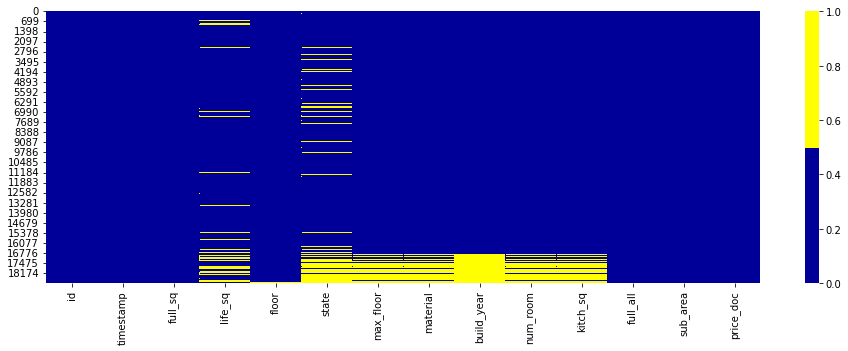

In [ ]:
plt.figure(figsize = (16,5))
cols = df_cleen.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colors = ['#000099', '#ffff00'] 
a = sns.heatmap(df_cleen[cols].isnull(), cmap=sns.color_palette(colors))

Есть ли аномальные данные в столбцах? Если да, то укажите на них и объясните, почему считаете аномальными

|Признак|Наименование на русском|Комментарий|
|--:|:--|:--|
|`id`|id|  |
|`timestamp`|дата продажи (транзакции)| Аномалий нет - с увеличением года продажи растет и средняя цена |
|`full_sq`|общая площадь|1. 1 546 квартир где сумма жилой площади и площади кухни больше общей площади, в т.ч. 24 квартиры где жилая прощадь превышает общую. Так-же есть квартиры где общая прощадь == жилой - в этом случае, площадь кухни может быть как доп. информация |
||| 2. Квартиры с площадью более 400 кв.м.(4 штк.), т.к. цена за кв. м. ниже 15 тыс. при средней - 150 тыс. скорее всего аномалия.|
||| 3. В законе установленна только норма мин жилой площади - 18 кв.м. т.к. общая должна быть больше жилой, то все квартиры с кв.м. общей прощадью менее 18 являются аномалиями|
|`life_sq`|жилая площадь| Аномалии - кв.м. менее нормы (18 кв.м.). max более 232 кв.м. т.к. начиная с данной отметки  жилая прощадь сильно превышает общую (6 квартир) либо равна жилой (2 штк) |
|`floor - max_floor`|этаж, максимальное количество этажей| 739 объектов в которых floor больше max_floor. Квартиры расположенные на 0 этаже. max_floor = 0 |
|`material`|материал, из которого изговолены стены|  |
|`build_year`|год строительства|Аномалии вместо года постройки -  '1.0', '3.0', '0.0', 'o', '71', '20052009.0' |
|`num_room`|количество жилых комнат|В количестве комнат 10, 17, 19 средняя жилая прощадь меньше (от 3.3 кв.м. до 1 кв.м. на комнату) чем в квартирах от 1 до 9 комнат (от 22 кв.м. до 15.5 кв.м.)|
|`kitch_sq`|площадь кухни|Есть объекты где площадь кухни больше общей площади помещения (в них же входят объекты с площадью больше 99.9%). Квартиры с 0 площадью могут быть как студии, так и квартиры в которых кухня объеденена с залом. |
|`full_all`|количество населения в регионе|  |
|`sub_area`|название территории| Необычно, что на территории Ajeroport есть квартиры |
|`price_doc`|| |
|`state`|жилищные условия| Имеется выброс - 33 |

###Поиск аномалий

### **1. timestamp**

In [ ]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.dt.year.sort_values().unique()

array([2011, 2012, 2013, 2014, 2015])

In [ ]:
df.timestamp.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   18866
unique                   1074
top       2014-12-16 00:00:00
freq                      133
first     2011-09-10 00:00:00
last      2015-06-30 00:00:00
Name: timestamp, dtype: object

Text(0.5, 1.0, 'Количество продаж по годам')

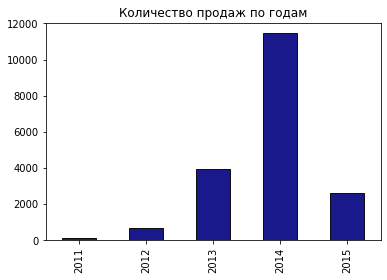

In [ ]:
df_s = df.timestamp.dt.year.value_counts().sort_index()
df_s.plot.bar(edgecolor='k', color = "navy", alpha=0.9)
plt.title("Количество продаж по годам")

Text(0.5, 1.0, 'Количество продаж по месяцам')

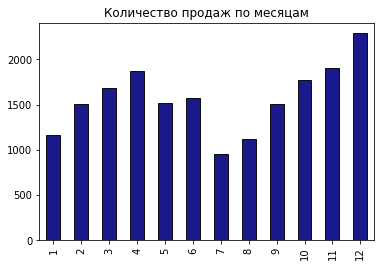

In [ ]:
df_m = df.timestamp.dt.month.value_counts().sort_index()
df_m.plot.bar(edgecolor='k', color = "navy", alpha=0.9)
plt.title("Количество продаж по месяцам")

Text(0.5, 1.0, 'Количество продаж по дням')

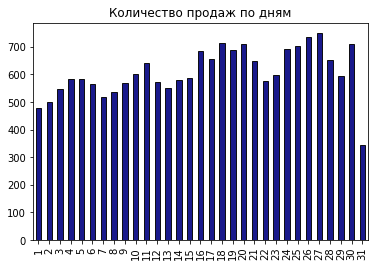

In [ ]:
df_m = df.timestamp.dt.day.value_counts().sort_index()
df_m.plot.bar(edgecolor='k', color = "navy", alpha=0.9)
plt.title("Количество продаж по дням")

In [ ]:
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month

Text(0.5, 1.0, 'Средняя цена квартир по годам продажи')

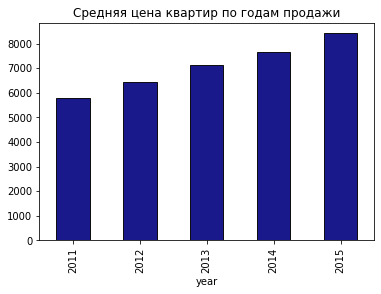

In [ ]:
df_s = df.groupby(["year"])["price_doc"].mean()/1000
df_s.plot.bar(edgecolor='k', color = "navy", alpha=0.9)
plt.title("Средняя цена квартир по годам продажи")

Text(0.5, 1.0, 'Средняя цена квартир по месяцам продажи')

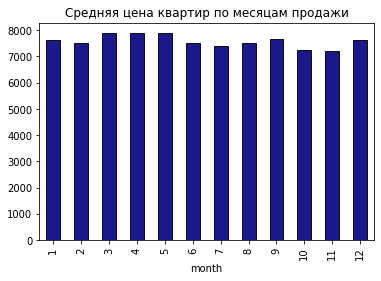

In [ ]:
df_mon = df.groupby(["month"])["price_doc"].mean()/1000
df_mon.plot.bar(edgecolor='k', color = "navy", alpha=0.9)
plt.title("Средняя цена квартир по месяцам продажи")

### **2. Площадь (общая, жилая, прощадь кухни)**

Text(0.5, 1.0, 'Площадь кухни')

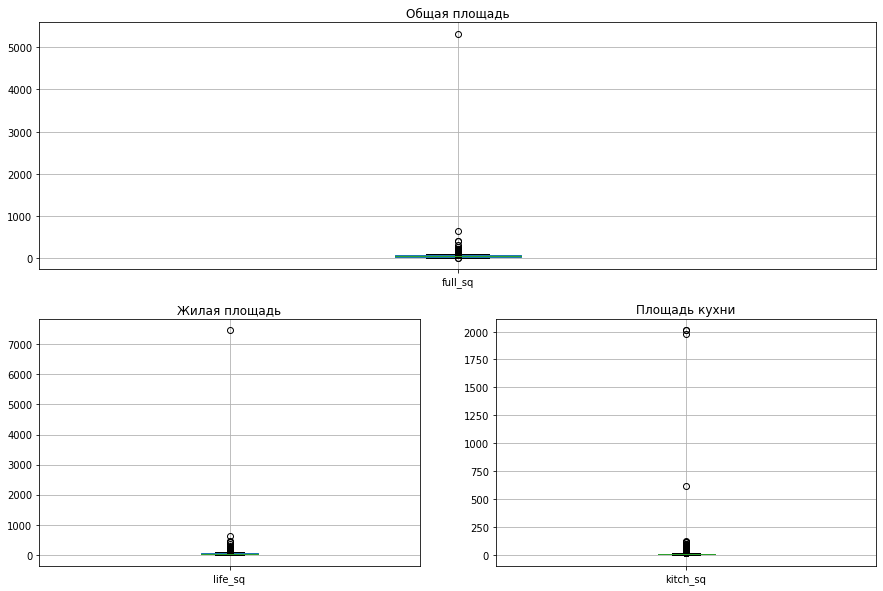

In [ ]:
plt.figure(figsize = (15,10) )
plt.subplot(2,1,1,)
df.boxplot("full_sq")
plt.title("Общая площадь")
plt.subplot(2,2,3,)
df.boxplot("life_sq")
plt.title("Жилая площадь")
plt.subplot(2,2,4,)
df.boxplot("kitch_sq")
plt.title("Площадь кухни")

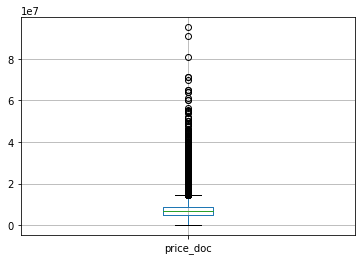

In [ ]:
df.boxplot("price_doc")

In [ ]:
df["price_doc_full_sq"] = df['price_doc']/df["full_sq"]
df["price_doc_full_sq"].describe()/1000

count     18.8660
mean          inf
std           NaN
min        1.2897
25%      104.8667
50%      147.6190
75%      175.3079
max           inf
Name: price_doc_full_sq, dtype: float64

In [ ]:
df[df["price_doc"]>200000.0]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,year,month,price_doc_full_sq
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000,2013,5,250000.0000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,9000000,2013,5,169811.3208
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,7011550,2013,5,91059.0909
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,6.0,78616,Severnoe Butovo,7100000,2013,5,157777.7778
4,8178,2013-05-28,38,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6450000,2013,5,169736.8421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,21562,2014-08-15,78,NaN,14.0,NaN,0.0,6.0,NaN,2.0,0.0,7341,Poselenie Moskovskij,7722029,2014,8,99000.3718
18862,4796,2012-11-19,99,91.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,28179,Basmannoe,14800000,2012,11,149494.9495
18863,466,2011-11-25,38,24.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,142462,Mozhajskoe,6300000,2011,11,165789.4737
18864,27416,2015-01-21,77,NaN,11.0,NaN,0.0,1.0,NaN,3.0,0.0,39873,Poselenie Shherbinka,5966828,2015,1,77491.2727


In [ ]:
df_min_pr = df[["full_sq", "life_sq", "kitch_sq"]]
df_min_pr.describe(percentiles = [0.005, 0.01, 0.05, 0.1, .25, .50, .75, .90, .999])

,full_sq,life_sq,kitch_sq
count,18866.0000,17291.0000,17445.0000
mean,53.9409,34.2592,7.2064
std,44.1162,59.9446,26.9816
min,0.0000,0.0000,0.0000
0.5%,20.0000,1.0000,0.0000
1%,27.0000,1.0000,0.0000
5%,31.0000,16.0000,1.0000
10%,34.0000,18.0000,1.0000
25%,38.0000,20.0000,5.0000
50%,49.0000,30.0000,7.0000


In [ ]:
cor_df = df[df["full_sq"]>202]
cor_df.sort_values(by = "price_doc_full_sq")

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,year,month,price_doc_full_sq
18428,3530,2012-09-07,5326,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,1716730,Birjulevo Vostochnoe,6868818,2012,9,1289.6767
10813,22788,2014-09-23,637,637.0,18.0,1.0,19.0,4.0,2016.0,2.0,10.0,116742,Tverskoe,4725142,2014,9,7417.8053
14772,27796,2015-02-09,407,407.0,4.0,1.0,4.0,4.0,2015.0,1.0,10.0,112804,Filevskij Park,3134129,2015,2,7700.5627
18598,2428,2012-06-07,412,17.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,112804,Filevskij Park,6117000,2012,6,14847.0874
7431,18672,2014-05-20,209,209.0,0.0,1.0,3.0,4.0,2007.0,0.0,0.0,39873,Poselenie Shherbinka,10500000,2014,5,50239.2344
7322,18528,2014-05-16,275,232.0,11.0,1.0,37.0,6.0,2009.0,5.0,26.0,166803,Shhukino,15919294,2014,5,57888.3418
6660,17713,2014-04-22,219,118.0,31.0,1.0,48.0,4.0,2010.0,3.0,4.0,102726,Jakimanka,14526873,2014,4,66332.7534
15005,28084,2015-02-26,219,101.0,2.0,1.0,2.0,4.0,2014.0,6.0,16.0,102618,Juzhnoe Butovo,18000000,2015,2,82191.7808
4544,15148,2014-02-18,215,134.0,10.0,1.0,10.0,2.0,2003.0,6.0,7.0,37807,Savelki,23000000,2014,2,106976.7442
6294,17280,2014-04-11,220,176.0,8.0,1.0,12.0,4.0,2007.0,2.0,12.0,73148,Vojkovskoe,37325704,2014,4,169662.2909


In [ ]:
df[df["full_sq"]<18].sort_values(by = "full_sq")

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,year,month,price_doc_full_sq
11989,24299,2014-11-05,0,77.0,4.0,1.0,17.0,1.0,0.0,3.0,0.0,17790,Poselenie Vnukovskoe,8167508,2014,11,inf
6839,17935,2014-04-28,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9553,Poselenie Voskresenskoe,4425000,2014,4,inf
10765,22725,2014-09-20,1,1.0,1.0,1.0,25.0,1.0,2014.0,1.0,1.0,247469,Nekrasovka,4740000,2014,9,4.7400e+06
10517,22415,2014-09-11,1,47.0,11.0,1.0,17.0,1.0,2014.0,1.0,1.0,57999,Presnenskoe,14923206,2014,9,1.4923e+07
10321,22174,2014-09-03,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,17790,Poselenie Vnukovskoe,6256186,2014,9,6.2562e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17458,219,2011-10-27,17,13.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,139322,Severnoe Izmajlovo,3670000,2011,10,2.1588e+05
631,10325,2013-09-06,17,13.0,2.0,2.0,5.0,2.0,1962.0,1.0,2.0,1452550,Bogorodskoe,3750000,2013,9,2.2059e+05
275,9608,2013-08-02,17,10.0,4.0,2.0,5.0,2.0,1968.0,1.0,3.0,36154,Perovo,3700000,2013,8,2.1765e+05
11713,23938,2014-10-25,17,17.0,6.0,2.0,12.0,1.0,1980.0,1.0,8.0,61396,Otradnoe,2500000,2014,10,1.4706e+05


In [ ]:
df[(df["full_sq"])<(df["life_sq"])]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,year,month,price_doc_full_sq
165,9240,2013-07-16,47,301.0,4.0,2.0,12.0,1.0,1973.0,2.0,6.0,145088,Birjulevo Zapadnoe,5600000,2013,7,1.1915e+05
173,9259,2013-07-17,77,458.0,12.0,3.0,16.0,1.0,1996.0,3.0,10.0,178264,Jasenevo,13750000,2013,7,1.7857e+05
222,9485,2013-07-27,52,53.0,12.0,3.0,1.0,1.0,1983.0,2.0,8.0,27992,Juzhnoe Medvedkovo,3000000,2013,7,5.7692e+04
1399,11335,2013-10-18,1,40.0,10.0,1.0,17.0,1.0,2013.0,1.0,1.0,39873,Poselenie Shherbinka,3357774,2013,10,3.3578e+06
1712,11714,2013-10-31,56,58.0,15.0,2.0,17.0,1.0,1986.0,2.0,10.0,123000,Kon'kovo,2000000,2013,10,3.5714e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,24431,2014-11-07,74,78.0,13.0,1.0,25.0,4.0,2015.0,3.0,1.0,247469,Nekrasovka,7419500,2014,11,1.0026e+05
13542,26267,2014-12-11,1,60.0,17.0,1.0,17.0,1.0,2014.0,2.0,1.0,247469,Nekrasovka,5983900,2014,12,5.9839e+06
13602,26345,2014-12-12,75,435.0,3.0,3.0,22.0,1.0,1999.0,3.0,9.0,21155,Mitino,12900000,2014,12,1.7200e+05
15977,29305,2015-04-22,56,57.0,4.0,1.0,9.0,2.0,1973.0,3.0,5.0,57999,Presnenskoe,11000000,2015,4,1.9643e+05


In [ ]:
df[df["life_sq"]>165].sort_values(by = "life_sq")

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,year,month,price_doc_full_sq
4188,14712,2014-02-07,167,167.0,1.0,1.0,2.0,1.0,2016.0,3.0,1.0,116742,Tverskoe,7115197,2014,2,42605.9701
6177,17141,2014-04-08,172,172.0,10.0,1.0,12.0,2.0,1955.0,1.0,15.0,80791,Horoshevskoe,8000000,2014,4,46511.6279
11683,23899,2014-10-23,218,174.0,10.0,3.0,12.0,4.0,2007.0,2.0,13.0,73148,Vojkovskoe,46191272,2014,10,211886.5688
6294,17280,2014-04-11,220,176.0,8.0,1.0,12.0,4.0,2007.0,2.0,12.0,73148,Vojkovskoe,37325704,2014,4,169662.2909
17284,5505,2012-12-26,179,178.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,39873,Poselenie Shherbinka,9000000,2012,12,50279.3296
14353,27292,2015-01-14,179,179.0,3.0,1.0,3.0,5.0,2007.0,3.0,0.0,39873,Poselenie Shherbinka,8500000,2015,1,47486.0335
15983,29313,2015-04-22,197,197.0,1.0,1.0,2.0,4.0,2012.0,4.0,25.0,102618,Juzhnoe Butovo,18657500,2015,4,94708.1218
7431,18672,2014-05-20,209,209.0,0.0,1.0,3.0,4.0,2007.0,0.0,0.0,39873,Poselenie Shherbinka,10500000,2014,5,50239.2344
7322,18528,2014-05-16,275,232.0,11.0,1.0,37.0,6.0,2009.0,5.0,26.0,166803,Shhukino,15919294,2014,5,57888.3418
3272,13632,2014-01-10,45,259.0,5.0,NaN,5.0,1.0,1970.0,2.0,5.0,7341,Poselenie Moskovskij,4900000,2014,1,108888.8889


In [ ]:
df[(df["kitch_sq"]> df["full_sq"])].sort_values(by = "kitch_sq")

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,year,month,price_doc_full_sq
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000,2013,5,250000.0000
2152,12248,2013-11-18,22,14.0,3.0,1.0,5.0,2.0,1970.0,1.0,33.0,1452550,Bogorodskoe,3600000,2013,11,163636.3636
11159,23219,2014-10-02,43,29.0,5.0,2.0,5.0,2.0,1962.0,2.0,44.0,103746,Metrogorodok,5900000,2014,10,137209.3023
150,9175,2013-07-12,37,19.0,9.0,2.0,10.0,1.0,2006.0,1.0,73.0,102828,Kosino-Uhtomskoe,5600000,2013,7,151351.3514
13519,26239,2014-12-11,34,16.0,2.0,1.0,17.0,2.0,2016.0,1.0,84.0,21819,Poselenie Desjonovskoe,3281884,2014,12,96526.0000
14003,26853,2014-12-19,38,20.0,4.0,2.0,12.0,1.0,1977.0,1.0,86.0,157010,Ivanovskoe,2000000,2014,12,52631.5789
15732,29000,2015-04-09,50,30.0,4.0,1.0,17.0,1.0,2014.0,2.0,97.0,247469,Nekrasovka,6500000,2015,4,130000.0000
1552,11523,2013-10-24,38,23.0,11.0,2.0,14.0,5.0,1971.0,2.0,620.0,72131,Novogireevo,6300000,2013,10,165789.4737
15530,28737,2015-03-31,31,16.0,2.0,3.0,12.0,5.0,1972.0,1.0,1974.0,85219,Matushkino,1000000,2015,3,32258.0645
663,10371,2013-09-10,79,41.0,5.0,1.0,17.0,6.0,2013.0,3.0,2013.0,9553,Poselenie Voskresenskoe,7281225,2013,9,92167.4051


### **3. Flor, max_flor**

In [ ]:
df[df["floor"]> df["max_floor"]]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,year,month,price_doc_full_sq
7,8271,2013-05-31,93,93.0,3.0,1.0,1.0,1.0,2013.0,3.0,1.0,5740,Poselenie Pervomajskoe,5427640,2013,5,58361.7204
28,8502,2013-06-14,37,18.0,2.0,2.0,0.0,1.0,1979.0,1.0,0.0,86206,Bibirevo,6000000,2013,6,162162.1622
93,8915,2013-07-03,51,30.0,5.0,1.0,0.0,1.0,1997.0,2.0,8.0,41504,Beskudnikovskoe,3850000,2013,7,75490.1961
147,9164,2013-07-12,83,42.0,8.0,2.0,3.0,2.0,1961.0,3.0,9.0,116742,Tverskoe,24435000,2013,7,294397.5904
174,9260,2013-07-17,45,18.0,8.0,1.0,1.0,1.0,2014.0,1.0,1.0,9553,Poselenie Voskresenskoe,4309670,2013,7,95770.4444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18841,15664,2014-03-04,39,NaN,24.0,NaN,0.0,1.0,NaN,1.0,0.0,115352,Nagornoe,8591320,2014,3,220290.2564
18845,19570,2014-06-10,79,79.0,9.0,NaN,1.0,1.0,NaN,3.0,1.0,221709,Krjukovo,8247200,2014,6,104394.9367
18859,28743,2015-03-31,59,NaN,4.0,NaN,0.0,1.0,NaN,2.0,0.0,39873,Poselenie Shherbinka,5188083,2015,3,87933.6102
18861,21562,2014-08-15,78,NaN,14.0,NaN,0.0,6.0,NaN,2.0,0.0,7341,Poselenie Moskovskij,7722029,2014,8,99000.3718


### **4. build_year**

In [ ]:
df["build_year"].unique()

array(['1907.0', '1980.0', '2014.0', '1970.0', '1982.0', '2013.0',
       '2004.0', '2003.0', '1957.0', '1986.0', '1960.0', '1995.0',
       '1979.0', '1975.0', '1987.0', '1962.0', '1969.0', '1993.0',
       '1996.0', '1972.0', '2011.0', '1965.0', '2010.0', '1985.0',
       '2006.0', '1961.0', '1971.0', '1978.0', '1966.0', '1967.0',
       '2000.0', '1964.0', '1977.0', '1983.0', '1968.0', '1974.0',
       '2008.0', '1959.0', '2007.0', '1984.0', '1976.0', '1997.0',
       '1989.0', '1958.0', '1988.0', '2012.0', '1990.0', '1946.0',
       '1917.0', '2002.0', '2005.0', '2001.0', '1963.0', '1954.0',
       '1951.0', '1981.0', '1955.0', '1999.0', '2009.0', '1973.0',
       '1994.0', '1998.0', '1992.0', '1950.0', '1956.0', '2015.0', '0.0',
       '1932.0', '1.0', '1937.0', '1938.0', '1939.0', '1991.0', '1934.0',
       '1935.0', '20052009.0', '1947.0', '1953.0', '1933.0', '2016.0',
       '1930.0', '1912.0', '1929.0', '3.0', '1928.0', '1915.0', '1936.0',
       '1925.0', '1940.0', '1943.0', 

###**5 state**

In [ ]:
df["state"].unique()

array([ 3.,  1., nan,  2.,  4., 33.])

In [ ]:
df[df["state"]==33.]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,year,month,price_doc_full_sq
482,10092,2013-08-27,37,16.0,8.0,33.0,12.0,1.0,20052009.0,1.0,9.0,130396,Cheremushki,9000000,2013,8,243243.2432


### **6. room**

In [ ]:
df_rom = df.copy()
df_rom["room"] = df_rom["life_sq"]/df_rom["num_room"]
df_rom.groupby(["num_room"])["room"].mean()

num_room
0.0         NaN
1.0     22.1375
2.0     16.4570
3.0     16.8074
4.0     16.5754
5.0     16.4222
6.0     16.2500
7.0     15.5714
8.0     15.5417
9.0     16.0000
10.0     3.3500
17.0     1.7647
19.0     1.0000
Name: room, dtype: float64

#### **7. sub_area**

In [ ]:
df.groupby(["sub_area"])["full_all"].mean()

sub_area
Ajeroport            1100773.0
Akademicheskoe       1362363.0
Alekseevskoe         1359171.0
Altuf'evskoe           78418.0
Arbat                 741887.0
                       ...    
Vyhino-Zhulebino     1318695.0
Zamoskvorech'e        108171.0
Zapadnoe Degunino      87713.0
Zjablikovo             48439.0
Zjuzino                76670.0
Name: full_all, Length: 146, dtype: float64

In [ ]:
df[df["sub_area"]=="Ajeroport"]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,year,month,price_doc_full_sq
9,8290,2013-06-03,77,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,11700000,2013,6,151948.0519
256,9569,2013-08-01,63,35.0,8.0,NaN,9.0,2.0,1976.0,2.0,9.0,1100773,Ajeroport,13500000,2013,8,214285.7143
1184,11068,2013-10-08,64,43.0,5.0,2.0,9.0,1.0,1968.0,3.0,6.0,1100773,Ajeroport,10500000,2013,10,164062.5000
1244,11143,2013-10-10,55,34.0,1.0,2.0,4.0,2.0,1951.0,3.0,7.0,1100773,Ajeroport,9400000,2013,10,170909.0909
1489,11445,2013-10-22,82,54.0,6.0,3.0,8.0,1.0,1960.0,3.0,10.0,1100773,Ajeroport,19500000,2013,10,237804.8780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,30280,2015-06-16,72,46.0,2.0,3.0,8.0,2.0,1960.0,3.0,7.0,1100773,Ajeroport,12000000,2015,6,166666.6667
16874,8136,2013-05-25,42,30.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1100773,Ajeroport,7500000,2013,5,178571.4286
17777,1486,2012-03-11,76,46.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1100773,Ajeroport,9000000,2012,3,118421.0526
17847,7031,2013-04-03,80,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1100773,Ajeroport,22000000,2013,4,275000.0000


### 1.2.2 Макро показатели

Вывести пример данных (первые строки и случайные строки)

In [ ]:
macro.head(2)

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,2010-01-01,38410.5,11443.63,NaN,NaN,NaN,74.2
1,2010-01-02,38410.5,11443.63,NaN,NaN,NaN,74.2


In [ ]:
macro.sample()

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
2124,2015-10-26,64310.0,19140.87,49.67,38.84,30.41,76.77


Размер набора данных

In [ ]:
macro.shape

(2484, 7)

Описание типов данных по признакам

In [ ]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2191 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2211 non-null   float64
 4   rent_price_2room_eco  2211 non-null   float64
 5   rent_price_1room_eco  2211 non-null   float64
 6   average_life_exp      2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


Базовые статистики по признакам

In [ ]:
macro.describe(percentiles = [0.005, 0.01, 0.03, 0.05, 0.1, .25, .50, .75, .90, .99])

,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,2191.0000,2484.0000,2211.0000,2211.0000,2211.0000,2191.0000
mean,52188.9331,15331.4980,47.2997,38.8954,31.0024,75.9282
std,9068.5590,2789.1363,3.0702,5.0352,3.9841,0.8699
min,38410.5000,11443.6300,37.5400,0.1000,2.3100,74.2000
0.5%,38410.5000,11443.6300,37.5400,0.1000,2.3100,74.2000
1%,38410.5000,11443.6300,37.5400,0.1000,2.3100,74.2000
3%,38410.5000,11577.7100,41.5800,34.5600,27.7300,74.2000
5%,38410.5000,11702.1500,41.7600,34.7100,27.9400,74.2000
10%,38410.5000,11920.1300,43.4200,35.3500,28.2800,74.2000
25%,44898.7000,12992.4400,45.5300,37.9300,29.7800,75.7400


In [ ]:
macro.describe(include = ["O"])

,timestamp
count,2484
unique,2484
top,2010-01-01
freq,1


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

|Признак|Наименование на русском|Комментарий|
|--:|:--|:--|
|timestamp | дата, на которую актуальны макроэкономические показатели | Макро показатели представленны на 2 484 периода |
|salary | средняя зарплата в регионе | Средняя зарплата находиться в промежутке от 38 тыс. до 64 тыс. медиана - 49 тыс. |
|fixed_basket | стоимость потребительской корзины | Потреб. корзина находиться в промежутке от 11 тыс до 20 тыс. медиана - 15 тыс. |
|rent_price_3room_eco | стоимость аренды 3-х комнатного жилья эконом-класса | Стоимость аренды варьируется от 38 до 53 тыс. Среднее и медиана равны ! 47 тыс. |
|rent_price_2room_eco| стоимость аренды 2-х комнатного жилья эконом-класса|  Среднее и медиана ~ 39 тыс., max = 44 тыс.   |
|rent_price_1room_eco | стоимость аренды 1-но комнатного жилья эконом-класса | Среднее и медиана ~ 31 тыс., max = 35 тыс. |
|average_life_exp| средняя продолжительность жизни в регионе | Средняя продолжительность жизни - 76 лет|

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

|Признак|Наименование на русском|Комментарий|
|--:|:--|:--|
|timestamp | дата, на которую актуальны макроэкономические показатели |  |
|salary | средняя зарплата в регионе | Полезный, т.к. чем выше зп, тем более развит регион и цены на жилье должны быть выше |
|fixed_basket | стоимость потребительской корзины |Полезный, т.к. чем выще данный показатель, тем выше покупательская способность населения и цены на жилье будут выше |
|rent_price_3room_eco | стоимость аренды 3-х комнатного жилья эконом-класса |Полезный, т.к. аренда выше у квартир, которые были купленны дороже, т.о. верно и обратное утверждение |
|rent_price_2room_eco| стоимость аренды 2-х комнатного жилья эконом-класса| Полезный, т.к. аренда выше у квартир, которые были купленны дороже, т.о. верно и обратное утверждение   |
|rent_price_1room_eco | стоимость аренды 1-но комнатного жилья эконом-класса |Полезный, т.к. аренда выше у квартир, которые были купленны дороже, т.о. верно и обратное утверждение   |
|average_life_exp| средняя продолжительность жизни в регионе | Не полезный, т.к. хоть на продолжительность жизни и влияет уровень покупательской способности населения, но помимо данного фактора есть много других |

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [ ]:
macro_nul = macro.isnull().sum().to_frame().rename(columns={0:"count"})
macro_nul["%"] = round(macro.isnull().sum()/macro.count()*100,2)
macro_nul

,count,%
timestamp,0,0.00
salary,293,13.37
fixed_basket,0,0.00
rent_price_3room_eco,273,12.35
rent_price_2room_eco,273,12.35
rent_price_1room_eco,273,12.35
average_life_exp,293,13.37


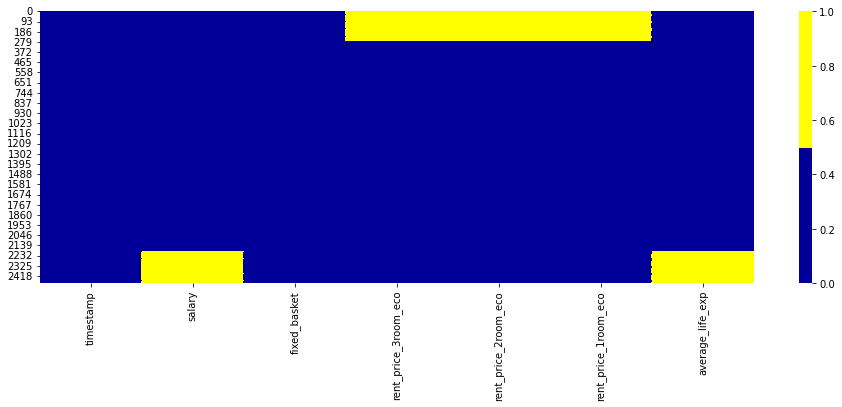

In [ ]:
plt.figure(figsize = (16,5))
cols = macro.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colors = ['#000099', '#ffff00'] 
a = sns.heatmap(macro[cols].isnull(), cmap=sns.color_palette(colors))

Есть ли аномальные данные в стллбцах? Если да, то укажите на них и объясните, почему считаете аномальными

|Признак|Наименование на русском|Комментарий|
|--:|:--|:--|
|timestamp | дата, на которую актуальны макроэкономические показатели |  |
|salary | средняя зарплата в регионе |  |
|fixed_basket | стоимость потребительской корзины | |
|rent_price_3room_eco | стоимость аренды 3-х комнатного жилья эконом-класса | |
|rent_price_2room_eco| стоимость аренды 2-х комнатного жилья эконом-класса| Аномалия - 0.1 |
|rent_price_1room_eco | стоимость аренды 1-но комнатного жилья эконом-класса |Аномалия - 2.31 |
|average_life_exp| средняя продолжительность жизни в регионе | |

In [ ]:
m_2room = macro[macro["rent_price_2room_eco"] < 34.56]
m_2room["rent_price_2room_eco"].unique()

array([33.38,  0.1 ])

In [ ]:
m_1room = macro[macro["rent_price_1room_eco"] < 27.73]
m_1room["rent_price_1room_eco"].unique()

array([27.58,  2.31])

## 1.3 Замените все ранее найденные ошибочные данные на None. Заполните все пропуски в данных: которые были и которые появились. Используйте как стратегии изученные на занятии, так и логику, которая вытекает из самих данных

### 1.3.1 Главный набор данных

In [ ]:
df_main= df_cleen.copy()

In [ ]:
df_main.loc[((df_main["life_sq"]<18) | (df_main["life_sq"]> 232)),"life_sq"] = np.nan #если жилая прощадь меньше 18 кв.м. и больше 232 - меняем на nan
df_main.loc[(((df_main["floor"]) > (df_main["max_floor"])) | (df_main["floor"] ==0)), "floor"] = np.nan #если этаж квартиры больше максимального этажа в доме и если этаж 0 - меняем на nan
#заменяем ошибочные данные в build_year на nan
df_main.loc[((df_main["build_year"]=="1.0") | (df_main["build_year"]=="3.0") | (df_main["build_year"]=="0.0") |(df_main["build_year"]=="o") | (df_main["build_year"]=="71.0") | (df_main["build_year"]=="20052009.0") | (df_main["build_year"]=="4965.0") | (df_main["build_year"]=="20.0")| (df_main["build_year"]=="215.0")),"build_year"] = np.nan
df_main.loc[((df_main["num_room"]==10.0) |(df_main["num_room"]==17.0)| (df_main["num_room"]==19.0)), "num_room"] = np.nan #количество комнат более 10 заменяем на nan
df_main.loc[(df_main["kitch_sq"]>df_main["full_sq"]),"kitch_sq"] = np.nan #если площадь кухни больше общей площади  - заменяем на nan
df_main.loc[((df_main["full_sq"]<18) | (df_main["full_sq"]> 400)),"full_sq"] = np.nan #если общая прощадь меньше 18 кв.м. и больше 400 - меняем на nan
df_main.loc[((df_main["full_sq"] < df_main["life_sq"]+df_main["kitch_sq"]) & (df_main["full_sq"] == df_main["life_sq"])), "kitch_sq"] = np.nan #в случае если общая площадь меньше жилой + кухни и общая==жилой - площадь кухни меняем на nan
df_main.loc[(df_main["full_sq"] < (df_main["life_sq"]+df_main["kitch_sq"])), "full_sq"] = np.nan #если общая+кухня больше общей и жилая не равна общей - меняем общую на nan
df_main.loc[(df_main["max_floor"]==0), "max_floor"] = np.nan #если максимальный этаж = 0 - меняем на nan
df_main.loc[(df_main["state"]==33.0), "state"] = np.nan #если выброс 33.00 - меняем на nan

In [ ]:
df_main["build_year"].unique()

array(['1907.0', '1980.0', '2014.0', '1970.0', '1982.0', '2013.0',
       '2004.0', '2003.0', '1957.0', '1986.0', '1960.0', '1995.0',
       '1979.0', '1975.0', '1987.0', '1962.0', '1969.0', '1993.0',
       '1996.0', '1972.0', '2011.0', '1965.0', '2010.0', '1985.0',
       '2006.0', '1961.0', '1971.0', '1978.0', '1966.0', '1967.0',
       '2000.0', '1964.0', '1977.0', '1983.0', '1968.0', '1974.0',
       '2008.0', '1959.0', '2007.0', '1984.0', '1976.0', '1997.0',
       '1989.0', '1958.0', '1988.0', '2012.0', '1990.0', '1946.0',
       '1917.0', '2002.0', '2005.0', '2001.0', '1963.0', '1954.0',
       '1951.0', '1981.0', '1955.0', '1999.0', '2009.0', '1973.0',
       '1994.0', '1998.0', '1992.0', '1950.0', '1956.0', '2015.0', nan,
       '1932.0', '1937.0', '1938.0', '1939.0', '1991.0', '1934.0',
       '1935.0', '1947.0', '1953.0', '1933.0', '2016.0', '1930.0',
       '1912.0', '1929.0', '1928.0', '1915.0', '1936.0', '1925.0',
       '1940.0', '1943.0', '1927.0', '1896.0', '1911.0', 

In [ ]:
df_main.isna().sum()

id               0
timestamp        0
full_sq        363
life_sq       3012
floor          774
state         3362
max_floor     1600
material      1421
build_year    2905
num_room      1425
kitch_sq      2646
full_all         0
sub_area         0
price_doc        0
dtype: int64

## **1.Заполнение пропусков по показателю  - floor/max_flor**

In [ ]:
#т.к. для прогнозирования цены интересует только первый, последний и прочие этажи, то пустые значения "max_floor" заполнитм максимальным
df_main["max_floor"] = df_main["max_floor"].fillna(df_main["max_floor"].max())
df_main['max_floor'].isna().sum()

0

In [ ]:
#этажи заполним медианой в зависимости max_floor
floor_gb = df_main.groupby('max_floor')['floor'].median()
df_main.loc[df_main['floor'].isna(), 'floor'] = df_main[df_main['floor'].isna()].apply(lambda x: floor_gb[x['max_floor']], axis=1)
df_main['floor'].isna().sum()

0

In [ ]:
#Проверим на ошибки
df_main[df_main['floor']>df_main['max_floor']]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc


## **2. Заполнение пропусков по показателю - Общая площадь**

In [ ]:
#Заполним общую прощадь как сумму жилой и кухни
df_main["full_sq"] = df_main["full_sq"].fillna(df_main["life_sq"]+ df_main["kitch_sq"])
df_main["full_sq"].isna().sum()

74

In [ ]:
#Остальные пропуски заполним медианой в зависимости от цены квартиры
full_gb = df_main.groupby('price_doc')['full_sq'].mean()
df_main.loc[df_main['full_sq'].isna(), 'full_sq'] = df_main[df_main['full_sq'].isna()].apply(lambda x: full_gb[x['price_doc']], axis=1)
df_main['full_sq'].isna().sum()

17

In [ ]:
df_main[df_main['full_sq'].isna()]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
5841,16741,2014-03-31,NaN,NaN,1.0,3.0,1.0,4.0,NaN,1.0,1.0,9553,Poselenie Voskresenskoe,7820575
6223,17197,2014-04-09,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,178473,Pokrovskoe Streshnevo,13066000
7376,18603,2014-05-19,NaN,NaN,1.0,3.0,1.0,1.0,NaN,1.0,1.0,116742,Tverskoe,6675730
10321,22174,2014-09-03,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,17790,Poselenie Vnukovskoe,6256186
10813,22788,2014-09-23,NaN,NaN,18.0,1.0,19.0,4.0,2016.0,2.0,10.0,116742,Tverskoe,4725142
10820,22798,2014-09-23,NaN,NaN,7.0,1.0,19.0,1.0,2015.0,3.0,1.0,39873,Poselenie Shherbinka,5591788
11170,23231,2014-10-03,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,76284,Nagatinskij Zaton,13452318
11425,23576,2014-10-15,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,115352,Nagornoe,11731927
12445,24895,2014-11-18,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,96959,Levoberezhnoe,17035200
13244,25890,2014-12-05,NaN,NaN,3.0,1.0,4.0,1.0,NaN,1.0,1.0,21155,Mitino,16160462


In [ ]:
#т.к у оставшихся пропущенных данных остутсвует значительная часть информации - 17 срок лушче удалить, чем заполнять данными, которые  будут искажать информацию
df_icp = df_main[~df_main['full_sq'].isna()].copy()
df_icp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18849 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          18849 non-null  int64  
 1   timestamp   18849 non-null  object 
 2   full_sq     18849 non-null  float64
 3   life_sq     15853 non-null  float64
 4   floor       18849 non-null  float64
 5   state       15489 non-null  float64
 6   max_floor   18849 non-null  float64
 7   material    17430 non-null  float64
 8   build_year  15957 non-null  object 
 9   num_room    17426 non-null  float64
 10  kitch_sq    16205 non-null  float64
 11  full_all    18849 non-null  int64  
 12  sub_area    18849 non-null  object 
 13  price_doc   18849 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 2.2+ MB


In [ ]:
df_icp.isna().sum()

id               0
timestamp        0
full_sq          0
life_sq       2996
floor            0
state         3360
max_floor        0
material      1419
build_year    2892
num_room      1423
kitch_sq      2644
full_all         0
sub_area         0
price_doc        0
dtype: int64

## **3.Жилая прощадь**

In [ ]:
#Заполним жилую прощадь как разность общей и кухни
df_icp["life_sq"] = df_icp["life_sq"].fillna(df_icp["full_sq"] - df_icp["kitch_sq"])
df_icp["life_sq"].isna().sum()

405

In [ ]:
#Расситаем коэффициент зависимости жилой прощади от общей и применим его к оставшимся пустым значениям
icp = (df_icp['life_sq'] / df_icp['full_sq']).mean()
df_icp["life_sq"] = df_icp["life_sq"].fillna(df_icp["full_sq"]*icp)
df_icp["life_sq"].isna().sum()

0

In [ ]:
df_icp[df_icp['life_sq'] ==0] #при заполнении пропусков некооретно заполнилась информация, т.к. общая прощадь = площади кухни.исключаем 

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
1833,11865,2013-11-06,54.0,0.0,22.0,1.0,22.0,6.0,2013.0,2.0,54.0,21155,Mitino,8383079


In [ ]:
df_icp = df_icp[df_icp['life_sq'] !=0].copy()

## **4.Количество комнат**

In [ ]:
#Количество комнат зависит от жилой площади - заполним медианой
num_room = df_icp.groupby('life_sq')['num_room'].median()
df_icp.loc[df_icp['num_room'].isna(), 'num_room'] = round(df_icp[df_icp['num_room'].isna()].apply(lambda x: num_room[x['life_sq']], axis=1),0)

#Количество комнат зависит от общей площади - заполним медианой
num_room2 = df_icp.groupby('full_sq')['num_room'].median()
df_icp.loc[df_icp['num_room'].isna(), 'num_room'] = round(df_icp[df_icp['num_room'].isna()].apply(lambda x: num_room2[x['full_sq']], axis=1),0)
df_icp['num_room'].isna().sum()

5

In [ ]:
df_icp[df_icp['num_room'].isna()]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
17390,5960,2013-02-07,45.9545,31.2965,5.0,NaN,57.0,NaN,NaN,NaN,NaN,105663,Juzhnoe Tushino,3500000
17727,9377,2013-07-22,49.4778,33.6959,8.0,NaN,57.0,NaN,NaN,NaN,NaN,76670,Zjuzino,4000000
17874,3858,2012-09-26,158.0000,158.0000,4.0,NaN,57.0,NaN,NaN,NaN,NaN,122862,Izmajlovo,36613500
18358,6634,2013-03-20,156.0000,106.2410,32.0,NaN,57.0,NaN,NaN,NaN,NaN,83844,Obruchevskoe,25233268
18753,3825,2012-09-25,158.0000,158.0000,4.0,NaN,57.0,NaN,NaN,NaN,NaN,122862,Izmajlovo,36613500


In [ ]:
df_icp = df_icp[~df_icp['num_room'].isna()].copy() #т.к. не понятно как заполнить - исключаем

Площадь кухни

In [ ]:
#Расситаем коэффициент зависимости  прощади кухни от общей и применим его к пустым значениям
icp_ki = (df_icp['kitch_sq'] / df_icp['full_sq']).mean()
df_icp["kitch_sq"] = df_icp["kitch_sq"].fillna(df_icp["full_sq"]*icp)
df_icp["kitch_sq"].isna().sum()

0

Год строительства, материалы и жилищные условия

In [ ]:
#год строительства может зависить от района, т.к. обучно дома в районах строяться группами
num_year = df_icp.groupby('sub_area')['build_year'].median()
df_icp.loc[df_icp['build_year'].isna(), 'build_year'] = df_icp[df_icp['build_year'].isna()].apply(lambda x: num_year[x['sub_area']], axis=1)
df_icp['build_year'].isna().sum()

0

In [ ]:
#материалы стен, можут зависить от района, т.к. обучно дома в районах строяться группами и с помощью одних и тех-же материалов
num_mat = df_icp.groupby('sub_area')['material'].median()
df_icp.loc[df_icp['material'].isna(), 'material'] = round(df_icp[df_icp['material'].isna()].apply(lambda x: num_mat[x['sub_area']], axis=1),0)
df_icp['material'].isna().sum()

0

In [ ]:
#жилищные условия, так-же могут зависить от района
num_sta = df_icp.groupby('sub_area')['state'].median()
df_icp.loc[df_icp['state'].isna(), 'state'] = round(df_icp[df_icp['state'].isna()].apply(lambda x: num_sta[x['sub_area']], axis=1),0)
df_icp['state'].isna().sum()

1

In [ ]:
#жилищные условия, так-же могут зависить от года постройки
num_sta2 = df_icp.groupby('build_year')['state'].median()
df_icp.loc[df_icp['state'].isna(), 'state'] = round(df_icp[df_icp['state'].isna()].apply(lambda x: num_sta2[x['build_year']], axis=1),0)
df_icp['state'].isna().sum()

0

In [ ]:
df_icp.isna().sum()

id            0
timestamp     0
full_sq       0
life_sq       0
floor         0
state         0
max_floor     0
material      0
build_year    0
num_room      0
kitch_sq      0
full_all      0
sub_area      0
price_doc     0
dtype: int64

### 1.3.2 Набор с макропоказателями

In [ ]:
macro.loc[(macro["rent_price_2room_eco"] == 0.1), "rent_price_2room_eco"] = np.nan
macro.loc[(macro["rent_price_1room_eco"] == 2.31), "rent_price_1room_eco"] = np.nan

In [ ]:
macro.isnull().sum()

timestamp                 0
salary                  293
fixed_basket              0
rent_price_3room_eco    273
rent_price_2room_eco    301
rent_price_1room_eco    304
average_life_exp        293
dtype: int64

In [ ]:
#заполним пропущенные данные средним т.к. явной зависимости между данными нет
macro["salary"] = macro["salary"].fillna(macro["salary"].mean())
macro["rent_price_3room_eco"] = macro["rent_price_3room_eco"].fillna(macro["rent_price_3room_eco"].mean())
macro["rent_price_2room_eco"] = macro["rent_price_2room_eco"].fillna(macro["rent_price_2room_eco"].mean())
macro["rent_price_1room_eco"] = macro["rent_price_1room_eco"].fillna(macro["rent_price_1room_eco"].mean())
macro["average_life_exp"] = macro["average_life_exp"].fillna(macro["average_life_exp"].mean())

In [ ]:
macro.isnull().sum()

timestamp               0
salary                  0
fixed_basket            0
rent_price_3room_eco    0
rent_price_2room_eco    0
rent_price_1room_eco    0
average_life_exp        0
dtype: int64

## 1.4 Обогатите основной набор данных данными из макропоказателей и поместите в переменную `df_full`

In [ ]:
df_full = df_icp.merge(macro, how='left') #для объединения использую метод left
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18843 entries, 0 to 18842
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18843 non-null  int64  
 1   timestamp             18843 non-null  object 
 2   full_sq               18843 non-null  float64
 3   life_sq               18843 non-null  float64
 4   floor                 18843 non-null  float64
 5   state                 18843 non-null  float64
 6   max_floor             18843 non-null  float64
 7   material              18843 non-null  float64
 8   build_year            18843 non-null  object 
 9   num_room              18843 non-null  float64
 10  kitch_sq              18843 non-null  float64
 11  full_all              18843 non-null  int64  
 12  sub_area              18843 non-null  object 
 13  price_doc             18843 non-null  int64  
 14  salary                18843 non-null  float64
 15  fixed_basket       

In [ ]:
df_icp.shape

(18843, 14)

In [ ]:
macro.shape

(2484, 7)

## 1.5 Проверьте данные на наличие выбросов. По каждому столбцу. Напишите своё мнение: нужно ли в каждой из ситуаций обрабатывать выбросы, или можно оставить. Если нужно обработать, то примените один из изученных подходов, либо предложите свой

### 1.5.1 Главный набор данных

In [ ]:
df_icp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18843 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          18843 non-null  int64  
 1   timestamp   18843 non-null  object 
 2   full_sq     18843 non-null  float64
 3   life_sq     18843 non-null  float64
 4   floor       18843 non-null  float64
 5   state       18843 non-null  float64
 6   max_floor   18843 non-null  float64
 7   material    18843 non-null  float64
 8   build_year  18843 non-null  object 
 9   num_room    18843 non-null  float64
 10  kitch_sq    18843 non-null  float64
 11  full_all    18843 non-null  int64  
 12  sub_area    18843 non-null  object 
 13  price_doc   18843 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 2.2+ MB


In [ ]:
def search_outliers(feature): # функция для поиска выбросов на основе межквартильного размаха
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((feature < lower_bound) | (feature > upper_bound))[0]

In [ ]:
df_coll = ['full_sq', 'life_sq', 'floor', 'max_floor', 'num_room', 'kitch_sq', 'full_all', 'price_doc']
for feature in df_coll:
    sum_outliers = len(search_outliers(df_icp[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов или {round(sum_outliers/(df_icp[feature].shape[0])*100,2)} % из {df_icp[feature].shape[0]} наблюдений")

Признак full_sq содержит 571 выбросов или 3.03 % из 18843 наблюдений
Признак life_sq содержит 940 выбросов или 4.99 % из 18843 наблюдений
Признак floor содержит 355 выбросов или 1.88 % из 18843 наблюдений
Признак max_floor содержит 1710 выбросов или 9.07 % из 18843 наблюдений
Признак num_room содержит 6 выбросов или 0.03 % из 18843 наблюдений
Признак kitch_sq содержит 2748 выбросов или 14.58 % из 18843 наблюдений
Признак full_all содержит 1630 выбросов или 8.65 % из 18843 наблюдений
Признак price_doc содержит 1119 выбросов или 5.94 % из 18843 наблюдений


In [ ]:
for feature in df_coll: # при применении логарифма, который частично нивелирует разницу между значениями
    sum_outliers = len(search_outliers(np.log1p(df_icp[feature])))
    print(f"Признак {feature} содержит {sum_outliers} выбросов или {round(sum_outliers/(df_icp[feature].shape[0])*100,2)} % из {df_icp[feature].shape[0]} наблюдений")

Признак full_sq содержит 161 выбросов или 0.85 % из 18843 наблюдений
Признак life_sq содержит 161 выбросов или 0.85 % из 18843 наблюдений
Признак floor содержит 0 выбросов или 0.0 % из 18843 наблюдений
Признак max_floor содержит 2449 выбросов или 13.0 % из 18843 наблюдений
Признак num_room содержит 0 выбросов или 0.0 % из 18843 наблюдений
Признак kitch_sq содержит 4316 выбросов или 22.91 % из 18843 наблюдений
Признак full_all содержит 2165 выбросов или 11.49 % из 18843 наблюдений
Признак price_doc содержит 1798 выбросов или 9.54 % из 18843 наблюдений


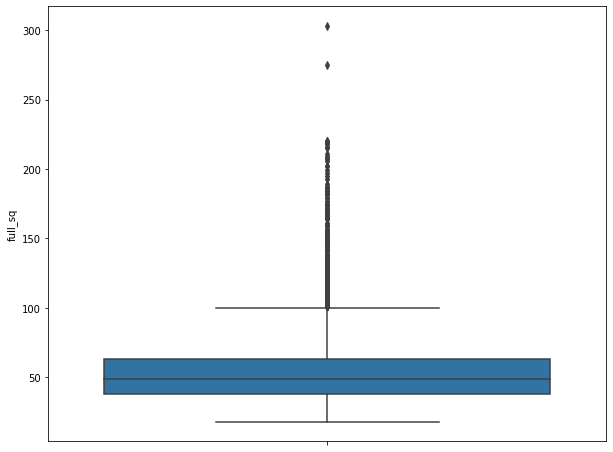

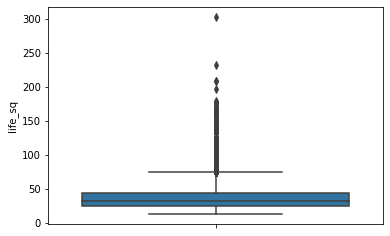

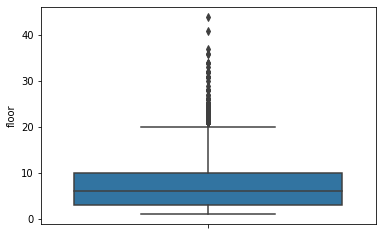

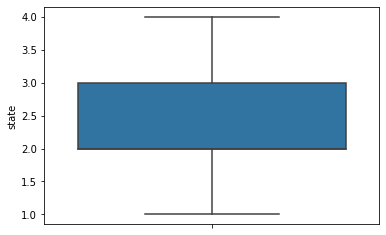

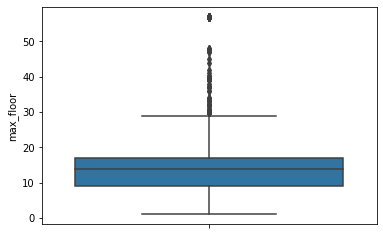

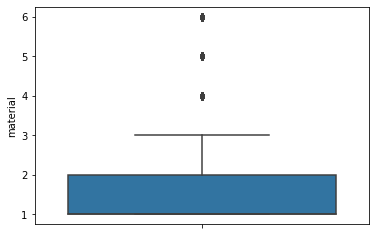

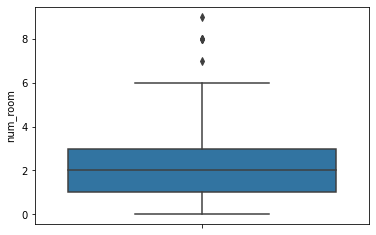

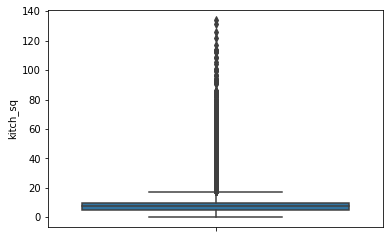

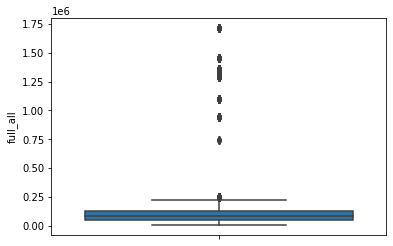

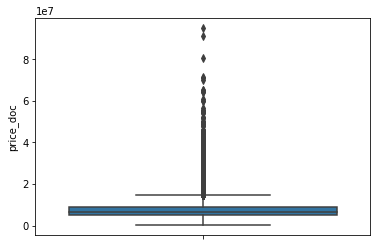

In [ ]:
plt.figure(figsize=(10,8))
for column in df_icp.select_dtypes(include=[int, float]).columns[1:]:
    sns.boxplot(y=column, data=df_icp)
    plt.show()

**Вывод: Существенные выбросы в данных были исключены и исправлены ранее, при исправлении ошибок и заполнении пропусков. Дополнительная очистка не требуется.**

### 1.5.2 Набор с макропоказателями

In [ ]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2484 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2484 non-null   float64
 4   rent_price_2room_eco  2484 non-null   float64
 5   rent_price_1room_eco  2484 non-null   float64
 6   average_life_exp      2484 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


In [ ]:
macro_coll = ['salary', 'fixed_basket', 'rent_price_3room_eco', 'rent_price_2room_eco', 'rent_price_1room_eco', 'average_life_exp']
for feature in macro_coll:
    sum_outliers = len(search_outliers(macro[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов или {round(sum_outliers/(macro[feature].shape[0])*100,2)} % из {macro[feature].shape[0]} наблюдений")

Признак salary содержит 0 выбросов или 0.0 % из 2484 наблюдений
Признак fixed_basket содержит 0 выбросов или 0.0 % из 2484 наблюдений
Признак rent_price_3room_eco содержит 31 выбросов или 1.25 % из 2484 наблюдений
Признак rent_price_2room_eco содержит 31 выбросов или 1.25 % из 2484 наблюдений
Признак rent_price_1room_eco содержит 0 выбросов или 0.0 % из 2484 наблюдений
Признак average_life_exp содержит 365 выбросов или 14.69 % из 2484 наблюдений


In [ ]:
for feature in macro_coll: # при применении логарифма, который частично нивелирует разницу между значениями
    sum_outliers = len(search_outliers(np.log1p(macro[feature])))
    print(f"Признак {feature} содержит {sum_outliers} выбросов или {round(sum_outliers/(macro[feature].shape[0])*100,2)} % из {macro[feature].shape[0]} наблюдений")

Признак salary содержит 0 выбросов или 0.0 % из 2484 наблюдений
Признак fixed_basket содержит 0 выбросов или 0.0 % из 2484 наблюдений
Признак rent_price_3room_eco содержит 62 выбросов или 2.5 % из 2484 наблюдений
Признак rent_price_2room_eco содержит 31 выбросов или 1.25 % из 2484 наблюдений
Признак rent_price_1room_eco содержит 0 выбросов или 0.0 % из 2484 наблюдений
Признак average_life_exp содержит 365 выбросов или 14.69 % из 2484 наблюдений


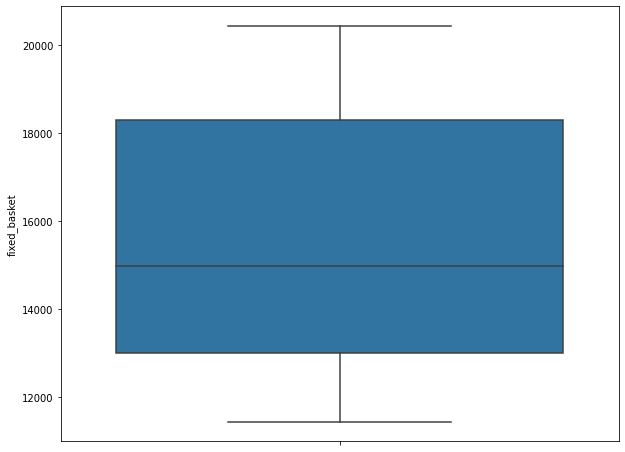

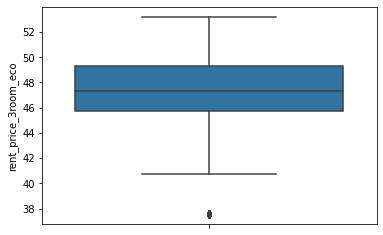

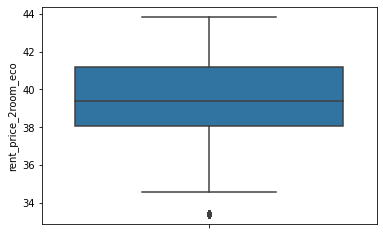

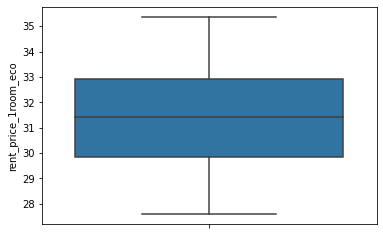

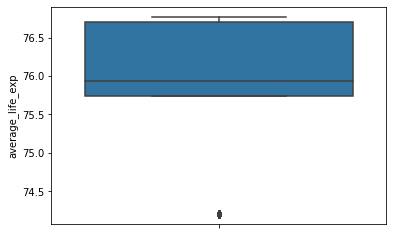

In [ ]:
plt.figure(figsize=(10,8))
for column in macro.select_dtypes(include=[int, float]).columns[1:]:
    sns.boxplot(y=column, data=macro)
    plt.show()

**Вывод: Существенные выбросы в данных были исключены и исправлены ранее, при исправлении ошибок и заполнении пропусков. Дополнительная очистка не требуется.**

## 1.6 Создайте не менее 5 новых признаков на основе существующих данных. Опишите текстом обоснование создания каждой. Признаки должны привносить некую новую информацию для понимания цены квартиры

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18843 entries, 0 to 18842
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18843 non-null  int64  
 1   timestamp             18843 non-null  object 
 2   full_sq               18843 non-null  float64
 3   life_sq               18843 non-null  float64
 4   floor                 18843 non-null  float64
 5   state                 18843 non-null  float64
 6   max_floor             18843 non-null  float64
 7   material              18843 non-null  float64
 8   build_year            18843 non-null  object 
 9   num_room              18843 non-null  float64
 10  kitch_sq              18843 non-null  float64
 11  full_all              18843 non-null  int64  
 12  sub_area              18843 non-null  object 
 13  price_doc             18843 non-null  int64  
 14  salary                18843 non-null  float64
 15  fixed_basket       

Средняя цена зависит от года продажи (данный факт был выявлен при анализе аномалий). Т.о. необходимо выделить отдельно год и месяц продажи. Месяц продажи используем для определения сезонности, т.к. предположительно спрос на квартиры падает в летние периоды и возрастает осенью.

In [ ]:
df_full['timestamp'] = pd.to_datetime(df_full.timestamp, format='%Y-%m-%d')

In [ ]:
df_full["month"] = df_full['timestamp'].dt.month
df_full['year'] = pd.DatetimeIndex(df_full['timestamp']).year

In [ ]:
def season(x):
    if x in [1, 12]:
        return 0
    if x in [2, 3, 4]:
        return 1
    if x in [5]:
        return 2
    if x in [6, 7, 8, 9]:
        return 3
    if x in [10, 11]:
        return 4

In [ ]:
df_full["season"] = df_full["month"].apply(season)

Можно предположить, что цена зависит от того на каком этаже расположена квартира - обычно на первом и последнем этажах цены на аналогичные квартиры ниже, чем цены на квартиры расположенные на прочих этажах. Так-же необходимо выделить отдельно квартиры с количеством этажей == 1.

In [ ]:
def flors (flor, max_f):
  if max_f != 1:
    if flor == max_f:
      return 0
    elif flor == 1:
      return 1
    else:
      return 2
  else:
    return 3

In [ ]:
df_full['flor_index'] = df_full[['floor', 'max_floor']].apply(lambda s: flors(*s), axis=1)

Полная стоимость квартиры в первую очередь зависит от стоимоти за 1 кв.м.

In [ ]:
df_full["price_kvm"] = df_full["price_doc"]/df_full["full_sq"]

Соотношение общей и жилой площади так-же влияет на стоимость квартиры, например если общая площадь большая, но в основном состоит из коридора, лоджий и прочих помещений не пригодных для жизни, то и цена на такие квартиры будет меньше

In [ ]:
df_full["life_full"] = df_full["life_sq"]/df_full["full_sq"]

Отношение площади кухни к общей площади так-же может влиять на стоимость квартиры, например если квартира большая, а кухня очень маленькая или наоборот, то данный показатель так-же может повлиять на цену квартиры не в лучшую сторону

In [ ]:
df_full["kit_full"] = df_full["kitch_sq"]/df_full["full_sq"]

In [ ]:
df_full.head(2)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,...,rent_price_2room_eco,rent_price_1room_eco,average_life_exp,month,year,season,flor_index,price_kvm,life_full,kit_full
0,8059,2013-05-21,93.0,63.336,2.0,3.0,5.0,2.0,1907.0,1.0,...,40.77,31.4105,76.37,5,2013,2,2,29569.8925,0.681,0.6810
1,8138,2013-05-25,53.0,30.000,10.0,3.0,16.0,1.0,1980.0,2.0,...,40.77,31.4105,76.37,5,2013,2,2,169811.3208,0.566,0.1509


## 1.7 Провести визуальный анализ всех признаков

Ко всем графикам писать выводы текстом. Что вы видите, почему построили именно такую диаграмму

### 1.7.1 Анализ признаков по отдельности (где нужно делать группировки, преобразования категориальных типов данных к числовым, смотреть в разрезе других категориальных признаков)

## **1.timestamp**

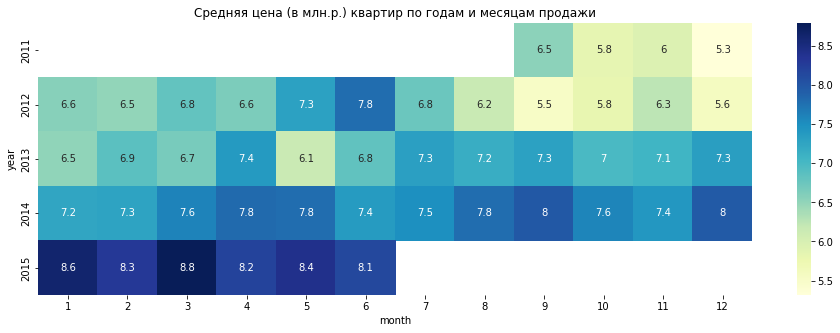

In [ ]:
#посмотрим насколько средняя цена зависит от года и месяца продажи квартиры
plt.figure(figsize = (16,5))
plt.title("Средняя цена (в млн.р.) квартир по годам и месяцам продажи")
prt = df_full.copy()
prt["price_tr"] = prt["price_doc"]/1000000
sns.heatmap(prt.pivot_table(values="price_tr", index = ['year'], columns =["month"], aggfunc = np.mean), annot = True,cmap="YlGnBu", cbar=True)

Text(0.5, 1.0, 'Количество продаж по дням')

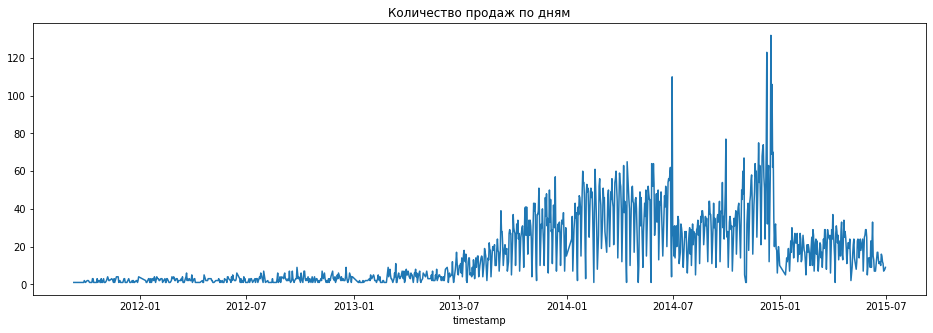

In [ ]:
#рассмотрим деловую активность 
plt.figure(figsize = (16,5))
df_full.groupby(df_full["timestamp"].dt.date)["price_doc"].count().plot()
plt.title("Количество продаж по дням")

Text(0.5, 1.0, 'Зависимость цены от сезона продажи')

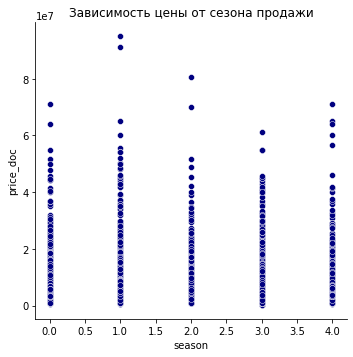

In [ ]:
sns.relplot(x='season', y='price_doc', data=df_full, color = "navy")
plt.title("Зависимость цены от сезона продажи")

Text(0.5, 1.0, 'Количество продаж по месяцам')

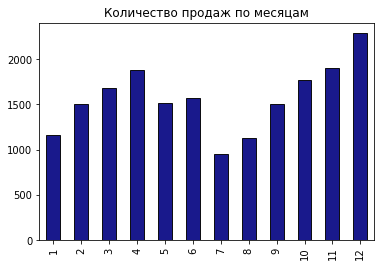

In [ ]:
df_m = df_full["month"].value_counts().sort_index()
df_m.plot.bar(edgecolor='k', color = "navy", alpha=0.9)
plt.title("Количество продаж по месяцам")

Наблюдается прямая зависимость стоимости жилья от года и месяца продажи.  

1. До середины 2013 года не наблюдалось существенной деловой активности – квартир в течении дня продавалось не более 10. После июня 2013 года количество продаж значительно увеличилось. Максимальный пик приходиться на начало и конец 2014 года (количество сделок в день превышало 100) .

2. В летние периоды и во время  новогодних каникул наблюдается снижение  количества продаж



## **2.full_sq**

In [ ]:
def destrib_fig(data, trait, n_bins=50, l_space_start=0, l_space_stop=0.5, l_space_count=10, dens=True): #Функция для построения гистограмм

    target_mean = round(data[trait].mean(), 2)
    target_median = data[trait].median()
    target_mode = data[trait].mode()[0]
    target_quant005 = data[trait].quantile(0.05)
    target_quant995 = data[trait].quantile(0.995)

    plt.figure(figsize = (13, 5))
    plt.hist(data[trait], density=dens, bins=n_bins, alpha=0.9, ec='Black',color = "navy" )

    y = np.linspace(l_space_start, l_space_stop, l_space_count)
    plt.plot([target_mean] * l_space_count, y, label='mean', linestyle='--', linewidth=2)
    plt.plot([target_median] * l_space_count, y, label='median', linestyle='--', linewidth=2)
    plt.plot([target_mode] * l_space_count, y, label='mode', linestyle='--', linewidth=2)
    plt.plot([target_quant005] * l_space_count, y, label='Quantile 0.05', linestyle='--',linewidth=2)
    plt.plot([target_quant995] * l_space_count, y, label='Quantile 0.995', linestyle='--',linewidth=2)
    plt.title(f'Гистограмма для переменной {trait}')
    plt.legend()
    plt.show()

<Figure size 1152x360 with 0 Axes>

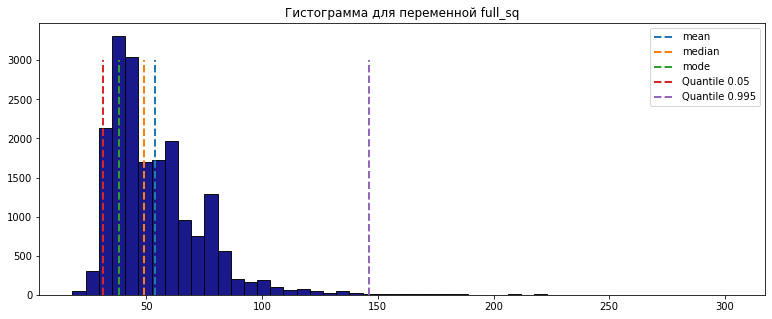

In [ ]:
plt.figure(figsize = (16,5))
destrib_fig(df_full, 'full_sq', dens=False, n_bins=50, l_space_stop=3000)

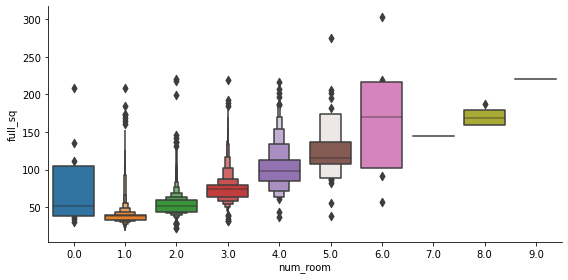

In [ ]:
sns.catplot(x="num_room", y="full_sq", data = df_full, height=4, aspect=2, kind='boxen')

Text(0.5, 1.0, 'Зависимость цены от общей площади')

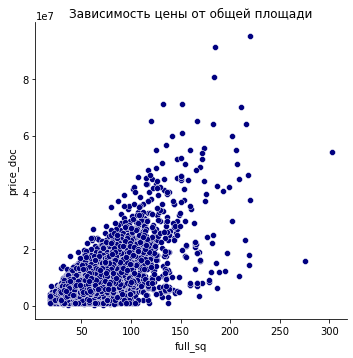

In [ ]:
sns.relplot(x='full_sq', y='price_doc', data=df_full, color = "navy")
plt.title("Зависимость цены от общей площади")

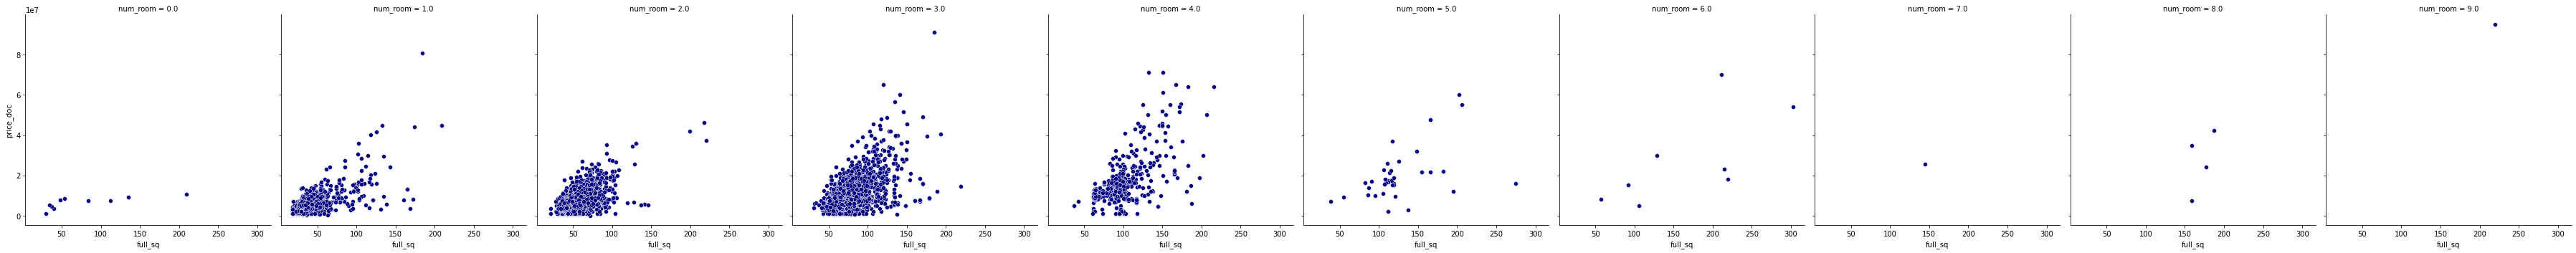

In [ ]:
sns.relplot(x='full_sq', y='price_doc', col= "num_room",data=df_full, color = "navy")

Больше всего проданных квартир имеют небольшую общую площадь (~от 25 до 48 кв. м). 

С ростом общей площади помещения растет и количество комнат, исключения составляют квартиры, в которых не указано количество комнат (студии).

Наблюдается прямая зависимость роста стоимости квартиры от увеличения общей площади помещения. Выбросы в основном соответствуют квартирам-студиям и квартирам с количеством комнат больше 4 . 

## **3.life_sq**

<Figure size 1152x360 with 0 Axes>

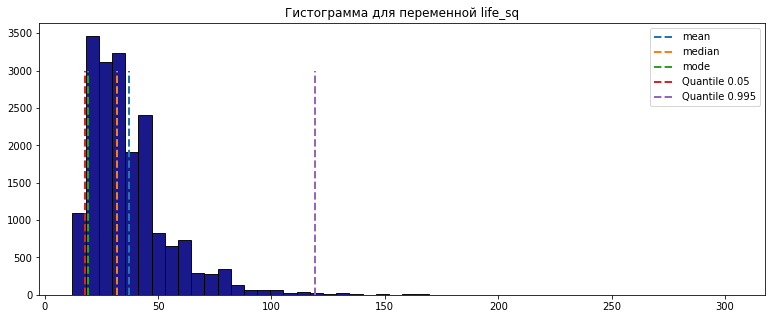

In [ ]:
plt.figure(figsize = (16,5))
destrib_fig(df_full, 'life_sq', dens=False, n_bins=50, l_space_stop=3000)

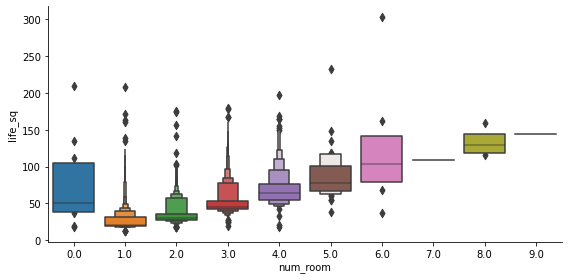

In [ ]:
sns.catplot(x="num_room", y="life_sq", data = df_full, height=4, aspect=2, kind='boxen')

Так-же как и по показателю “общая площадь” наиболее популярными являются квартиры с небольшой площадью.

## **5.floor**

Text(0.5, 1.0, 'Зависимость цены от этажа на котором расположена квартира')

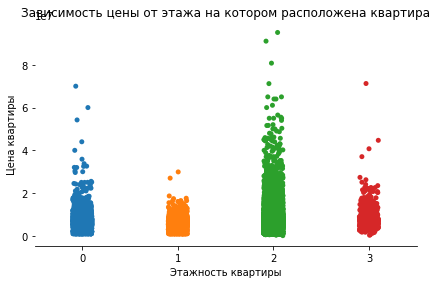

In [ ]:
g = sns.catplot(x="flor_index", y="price_doc", data = df_full, height=4, aspect=1.5)
(g.set_axis_labels("Этажность квартиры", "Цена квартиры") .despine(left=True)) 
plt.title("Зависимость цены от этажа на котором расположена квартира")

Стоимость квартир, находящихся на промежуточных этажах (индекс - 2) , выше, чем на других. На последнем этаже (индекс - 0) есть дорогие квартиры - предположительно с большой площадью. В большинстве случае квартиры на последнем этаже дороже, чем на первом (индекс - 1) . Частный сектор (индекс - 3) также пользуется спросом.

## **4.state**

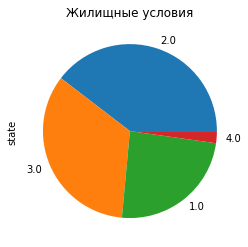

In [ ]:
df_full['state'].value_counts().plot(kind='pie', title='Жилищные условия')

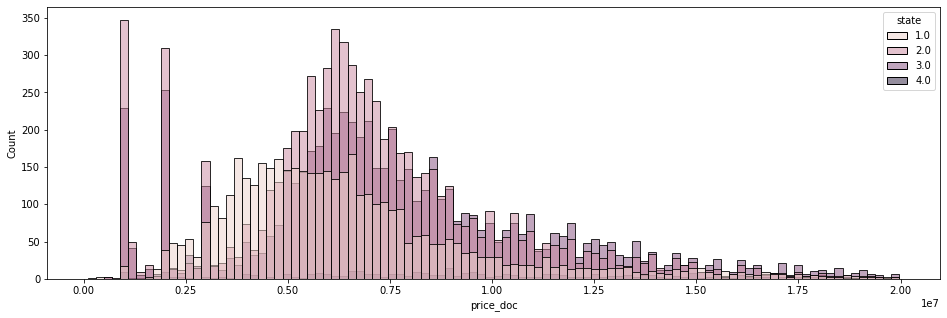

In [ ]:
plt.figure(figsize = (16,5))
sns.histplot(data=df_full[df_full["price_doc"]<20000000], x="price_doc", hue="state", bins=100)

Наиболее популярными являются квартиры с жилищными условиями 3 и 2. Можно отметить, что квартиры с жилищными условиям 1 и 2 стоят дешевле, чем квартиры с жилищными условиями 3 и 4.

## **7.material**

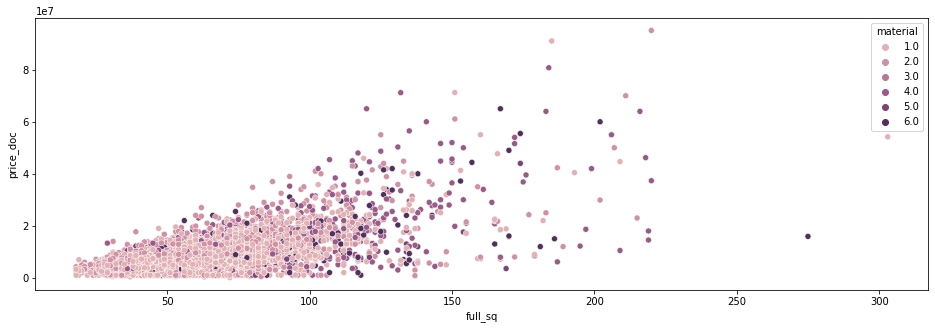

In [ ]:
plt.figure(figsize = (16,5))
sns.scatterplot(data=df_full, x='full_sq', y='price_doc', hue="material", sizes=(20, 200), hue_norm=(0, 7))

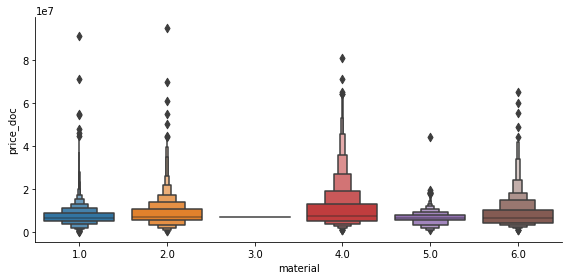

In [ ]:
sns.catplot(x="material", y="price_doc", data = df_full, height=4, aspect=2, kind='boxen')

Самым популярным является материал №1. Какой-либо зависимости стоимости квартиры от материала не звыявленно.

## **8.build_year**

In [ ]:
df_full['build_year'] = df_full['build_year'].apply(lambda x: float(x))
df_full['build_year'] = df_full['build_year'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Количество проданных квартир по годам постройки')

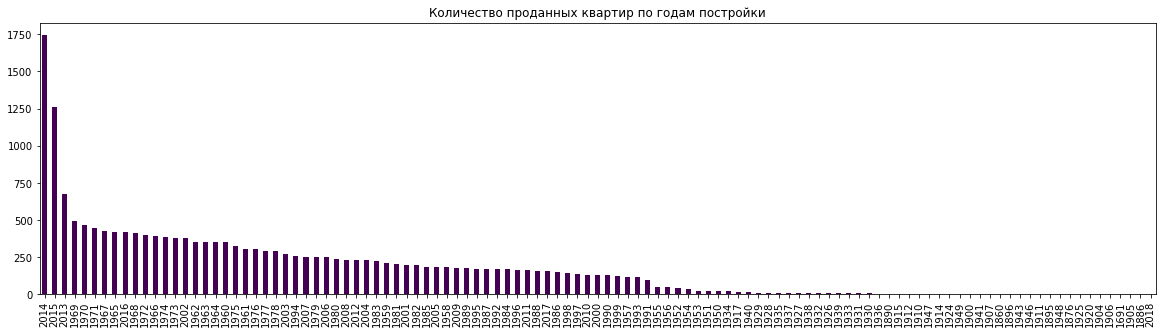

In [ ]:
plt.figure(figsize = (20,5))
df_full['build_year'].value_counts().plot.bar(stacked = True, cmap="viridis")
plt.title("Количество проданных квартир по годам постройки")

In [ ]:
def year_(x):
  if x < 2000:
    return 1
  else:
    return x

In [ ]:
prt["yer_"] = df_full["build_year"].apply(year_)

Text(0.5, 1.0, 'Средняя цена от года постройки и года продажи')

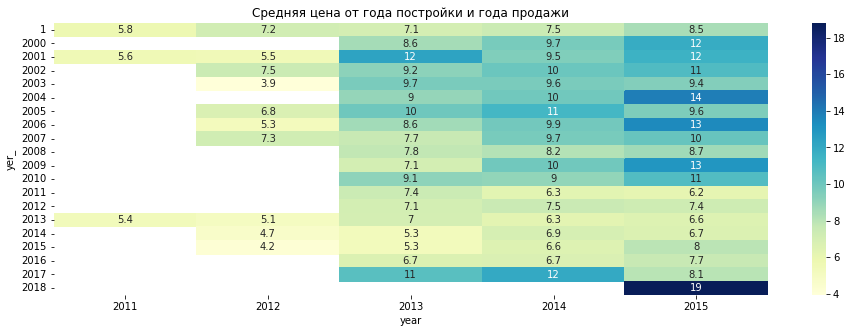

In [ ]:
plt.figure(figsize = (16,5))
sns.heatmap(prt.pivot_table(values="price_tr", index = ['yer_'], columns =["year"], aggfunc = np.mean), annot = True,cmap="YlGnBu", cbar=True)
plt.title("Средняя цена от года постройки и года продажи")

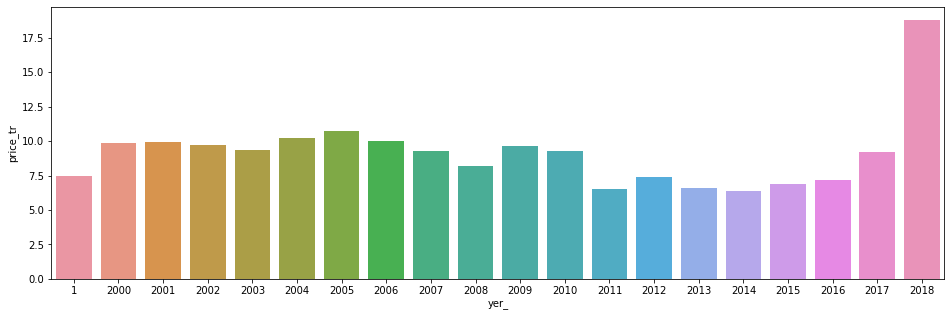

In [ ]:
plt.figure(figsize = (16,5))
data = prt.groupby(["yer_"], as_index = False)["price_tr"].mean()
sns.barplot(data=data, x = "yer_", y = "price_tr")

Больше всего продаж приходятся на квартиры построенные в 2013-2015 годах. 

Квартиры находящиеся на стадии котлована стоят  дороже, чем квартиры, которые продаются в сданных домах.

## **9.num_room**

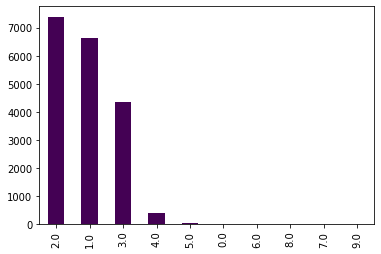

In [ ]:
df_full['num_room'].value_counts().plot.bar(stacked = True, cmap="viridis")

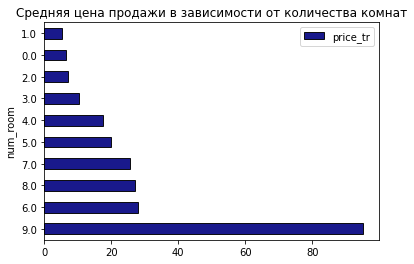

In [ ]:
prt.groupby("num_room").agg({"price_tr":"mean"}).sort_values(by = "price_tr", ascending = False).plot(kind='barh', title='Средняя цена продажи в зависимости от количества комнат', edgecolor='k', color = "navy", alpha=0.9)

Самыми популярными квартирами являются двухкомнатные, на втором месте однокомнатные и затем трехкомнатные.

Самыми дорогими квартирами являются квартиры с 9 комнатами - самыми дешевыми 1-а комнатные.

## **10. kitch_sq**

<Figure size 1152x360 with 0 Axes>

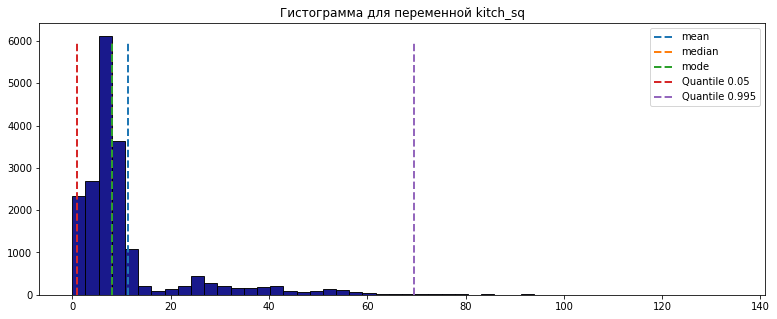

In [ ]:
plt.figure(figsize = (16,5))
destrib_fig(df_full, 'kitch_sq', dens=False, n_bins=50, l_space_stop=6000)

Популярными являются квартиры с небольшими кухнями ~до 7 кв.м.

## **11.full_all**

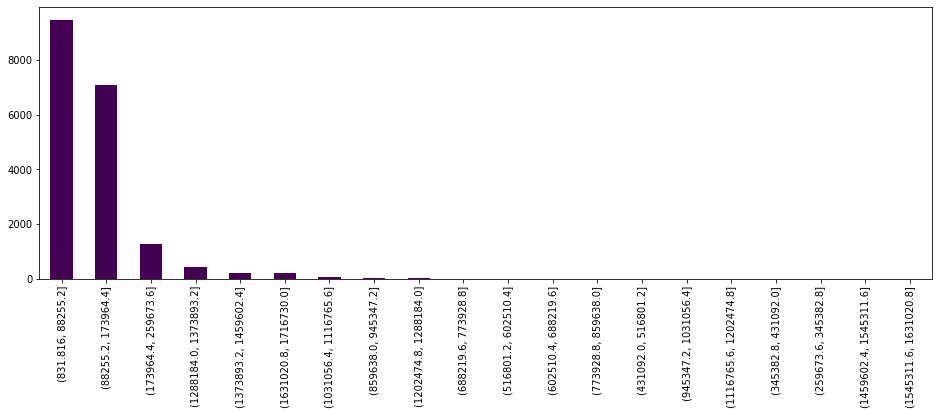

In [ ]:
plt.figure(figsize = (16,5))
pd.cut(df_full["full_all"], bins=20).value_counts().plot.bar(stacked = True, cmap="viridis")

Самыми популярными районами являются территории с количеством населения до 88 255.2

## **12.sub_area**

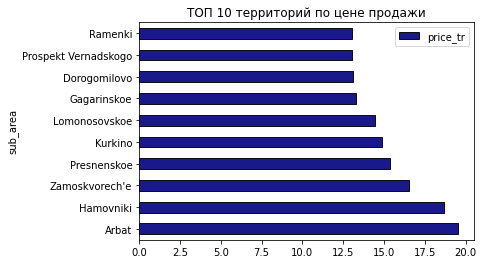

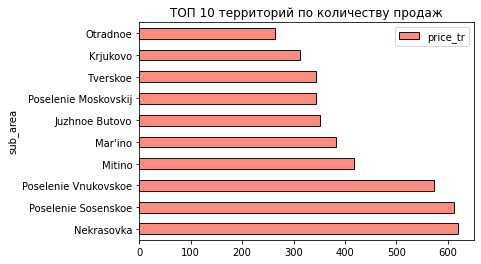

In [ ]:
#узнаем какие территории самые популярные и самые дорогие
prt.groupby("sub_area").agg({"price_tr":"mean"}).sort_values(by = "price_tr", ascending = False).head(10).plot(kind='barh', title='ТОП 10 территорий по цене продажи', edgecolor='k', color = "navy", alpha=0.9)
prt.groupby("sub_area").agg({"price_tr":"count"}).sort_values(by = "price_tr", ascending = False).head(10).plot(kind='barh', title='ТОП 10 территорий по количеству продаж', edgecolor='k', color = "salmon", alpha=0.9 )

Самый дорогой район - Arbat и Hamovniki - в данных районах продаются самые дорогие квартиры. Самые популярные районы - Nekrasovka и Poselenie Sosenckoe - в данных районах продается больше всего квартир

## **14.Макро показатели**

Text(0.5, 1.0, 'Зависимость  цены от  средней з/п ')

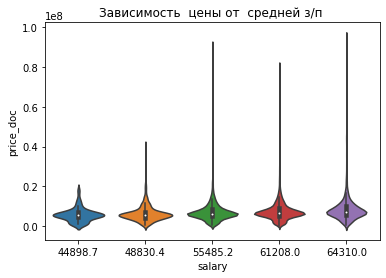

In [ ]:
sns.violinplot(x='salary', y='price_doc', data=df_full)
plt.title("Зависимость  цены от  средней з/п ")

Text(0.5, 1.0, 'Зависимость  цены от  стоимости потребительской корзины ')

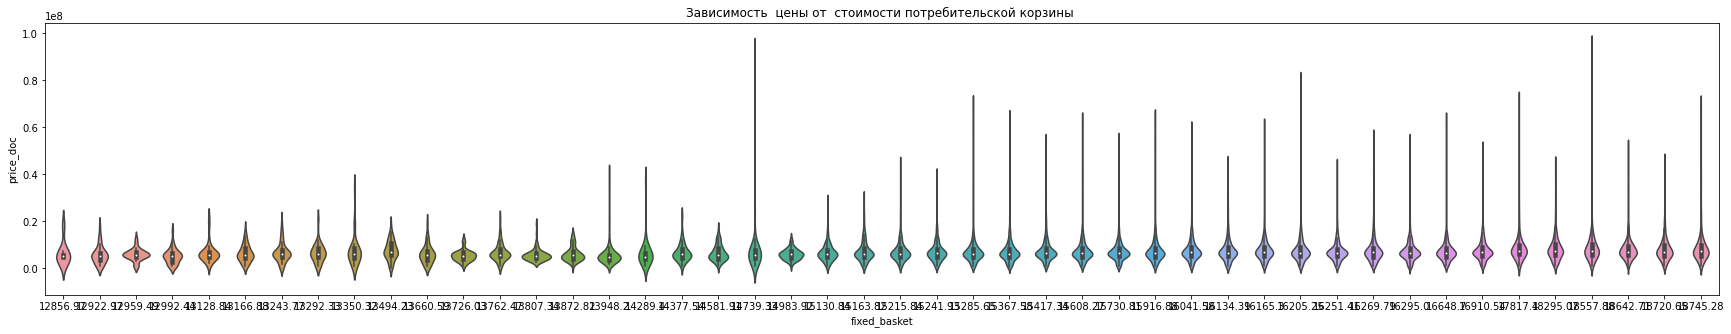

In [ ]:
plt.figure(figsize = (30,5))
sns.violinplot(x='fixed_basket', y='price_doc', data=df_full)
plt.title("Зависимость  цены от  стоимости потребительской корзины ")

Text(0.5, 1.0, 'Зависимость  цены от продолжительности жизни')

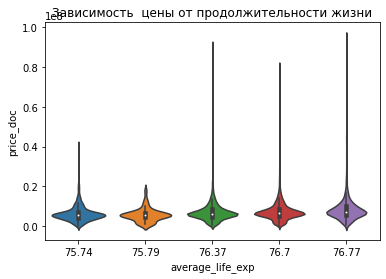

In [ ]:
sns.violinplot(x='average_life_exp', y='price_doc', data=df_full)
plt.title("Зависимость  цены от продолжительности жизни")

Имеется несущественная зависимость стоимости жилья от макропоказателей в регионе. 

## **15.Аренда квартир**

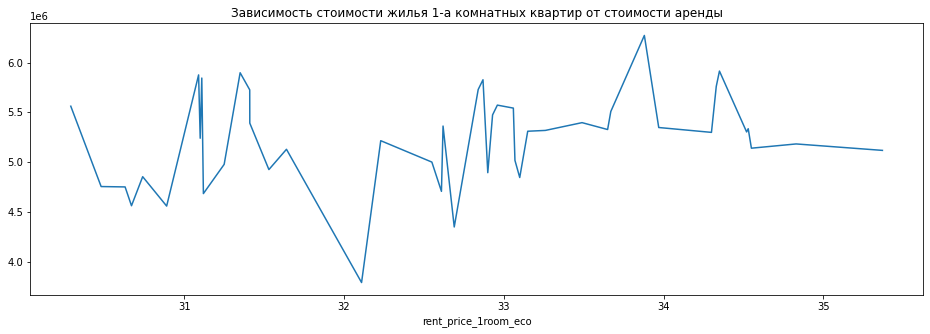

In [ ]:
df1 = df_full[df_full["num_room"]==1]
plt.figure(figsize = (16,5))
df1.groupby(df1["rent_price_1room_eco"])["price_doc"].mean().plot(title = "Зависимость стоимости жилья 1-а комнатных квартир от стоимости аренды")

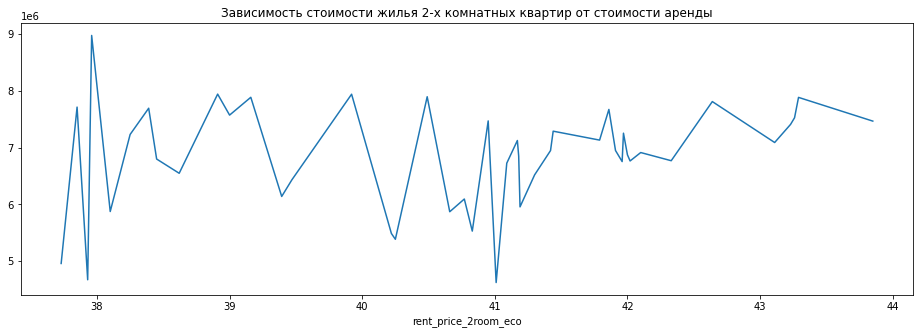

In [ ]:
df2 = df_full[df_full["num_room"]==2]
plt.figure(figsize = (16,5))
df2.groupby(df2["rent_price_2room_eco"])["price_doc"].mean().plot(title = "Зависимость стоимости жилья 2-х комнатных квартир от стоимости аренды")

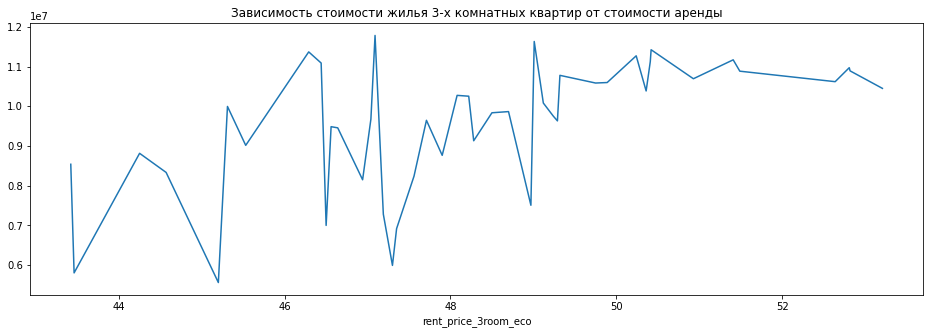

In [ ]:
df3 = df_full[df_full["num_room"]==3]
plt.figure(figsize = (16,5))
df3.groupby(df3["rent_price_3room_eco"])["price_doc"].mean().plot(title = "Зависимость стоимости жилья 3-х комнатных квартир от стоимости аренды")

Цена на квартиры существенно не зависит от стоимости аренды, исключения составляют 3-х комнатные квартиры.

### 1.7.2 Анализ совместного влияния признаков и их влияния на целевой признак

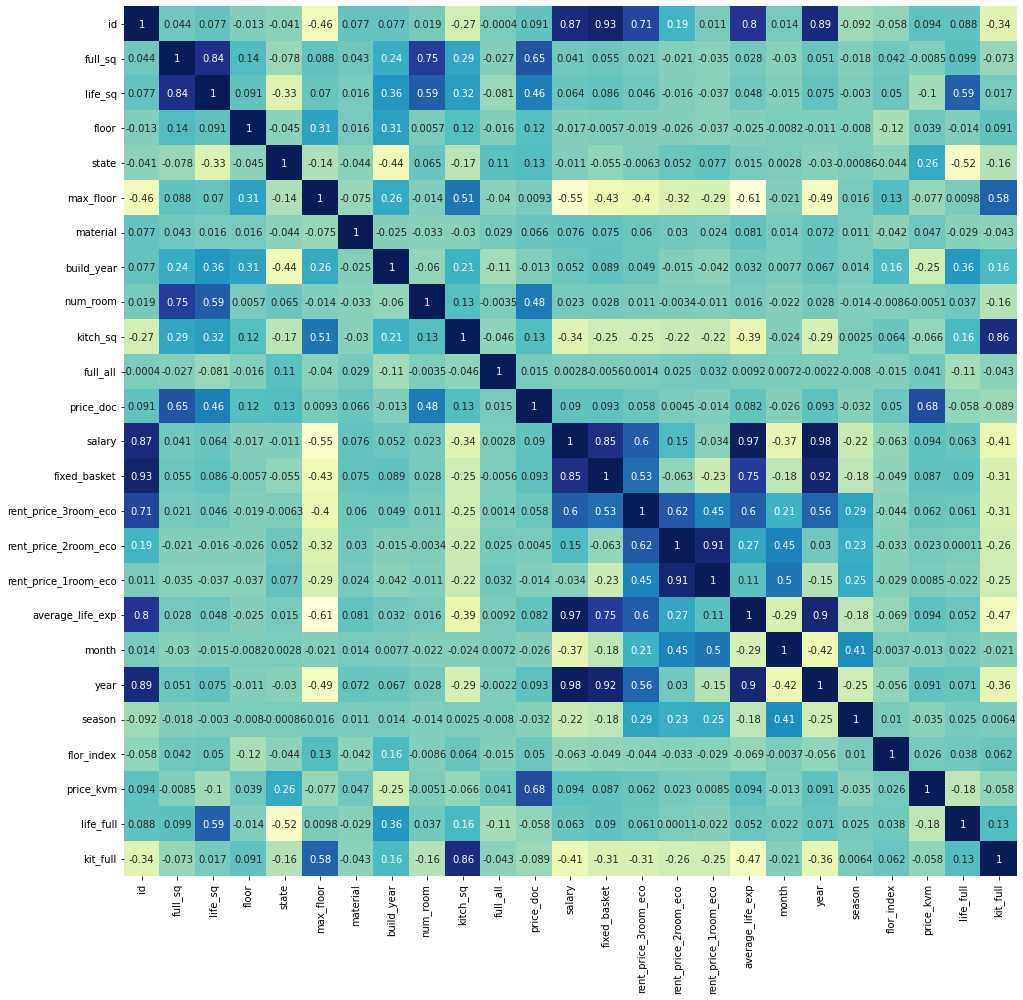

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df_full.corr(), annot=True, cmap="YlGnBu", cbar=False);

In [ ]:
par = df_full[["full_sq", "life_sq", "kitch_sq", "price_doc", "floor", "build_year", "month", "year"]] #Рассмотрим более подробно зависимость по основным показателям

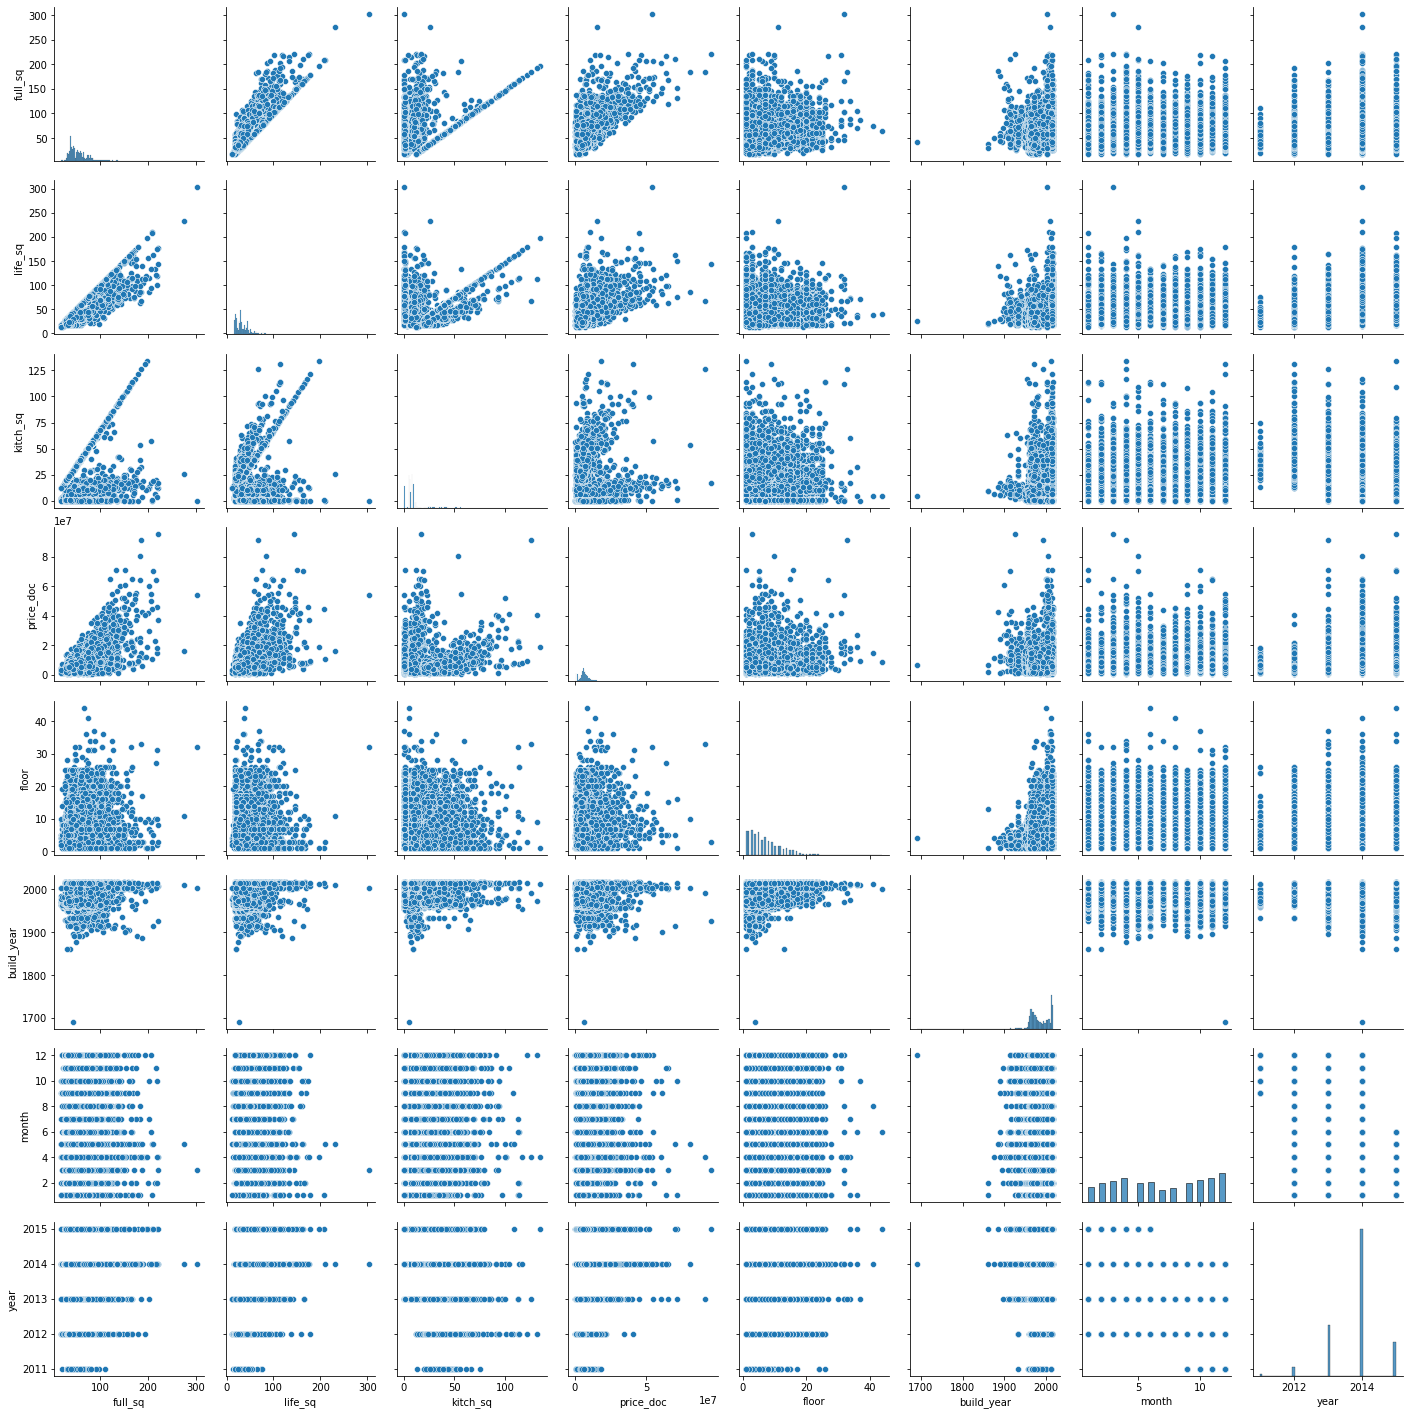

In [ ]:
sns.pairplot(par)

Показатели "общая площадь", "жилая площадь" и количество комнат оказывают влияние на цену квартиры. По остальным показателям существенной зависимости не выявлено